#### 애플 기업의 주식과 금 주식을 비교하여 미래 주식 시장 예측 프로젝트

In [44]:
import yfinance as yf

columns = ['AAPL', 'GLD']

f_df = yf.download(columns, start='2010-01-01')['Adj Close'].round(4)
f_df

[*********************100%%**********************]  2 of 2 completed


Ticker,AAPL,GLD
Date,,
2010-01-04,6.4707,109.80
2010-01-05,6.4819,109.70
2010-01-06,6.3788,111.51
2010-01-07,6.3670,110.82
2010-01-08,6.4094,111.37
...,...,...
2024-06-10,193.1200,213.54
2024-06-11,207.1500,214.15
2024-06-12,213.0700,214.72


#### 애플 - ACF & PACF 분석 

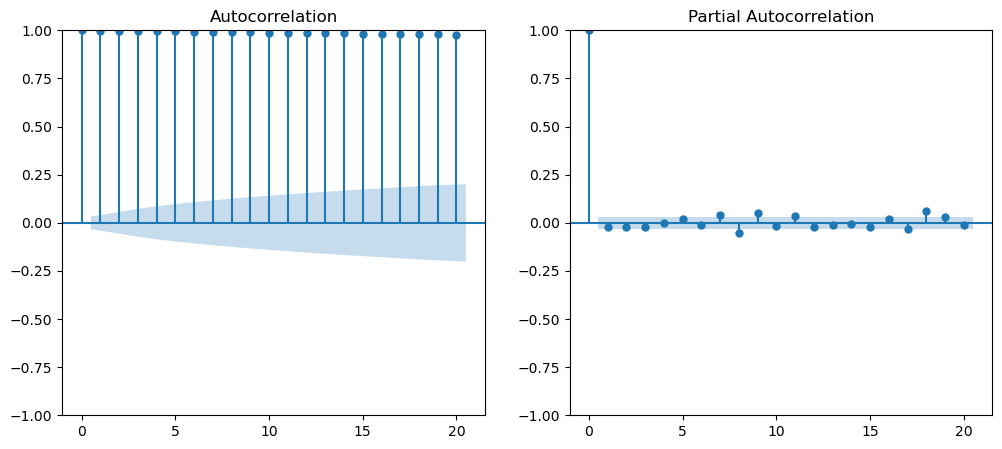

In [49]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd


# 시계열 데이터에서 특정 열 선택 (예: 'AAPL')
time_series = f_df['AAPL']

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# 첫 번째 서브플롯에 ACF 그리기
plot_acf(time_series, lags=20, ax=ax[0])

# 두 번째 서브플롯에 차분 데이터의 PACF 그리기
plot_pacf(time_series.diff().dropna(), lags=20, ax=ax[1])

plt.show()



#### ACF, PACF 비교

- **ACF 그래프**를 보낸다.
  - ACF가 점차 감소하는 패턴은 데이터가 자기상관을 가지고 알 수 한다.

- **PACF 그래프**를 보면:
  - 대부분의 지연이 0에 가깝고, 처음 몇 개의 지연만이 유의미한 상관관계를 보인다.
  - 이는 데이터가 몇 개의 시차만을 고려할 때 자기상관이 존재함을 보여준다.


#### 애플 - ACF & PACF 분석 

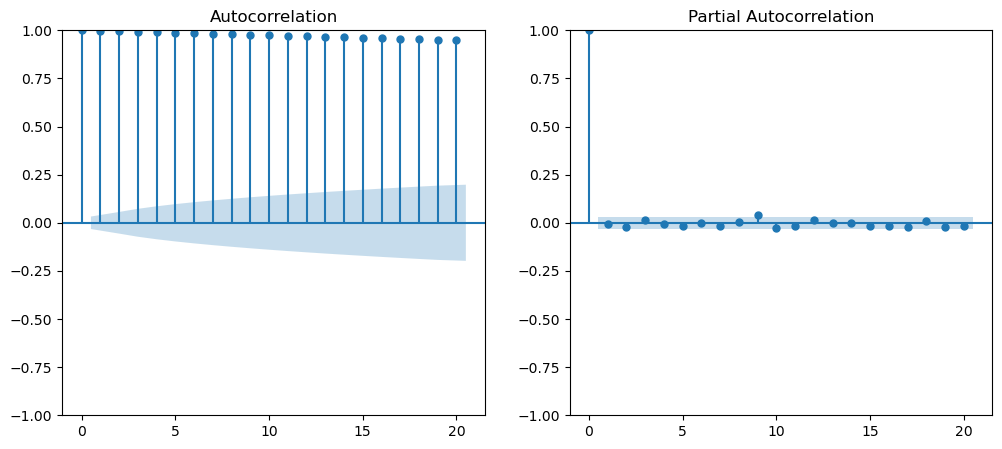

In [76]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd


# 시계열 데이터에서 특정 열 선택 (예: 'AAPL')
time_series = f_df['GLD']

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# 첫 번째 서브플롯에 ACF 그리기
plot_acf(time_series, lags=20, ax=ax[0])

# 두 번째 서브플롯에 차분 데이터의 PACF 그리기
plot_pacf(time_series.diff().dropna(), lags=20, ax=ax[1])

plt.show()

In [2]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3637 entries, 2010-01-04 to 2024-06-14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3637 non-null   float64
 1   GLD     3637 non-null   float64
dtypes: float64(2)
memory usage: 85.2 KB


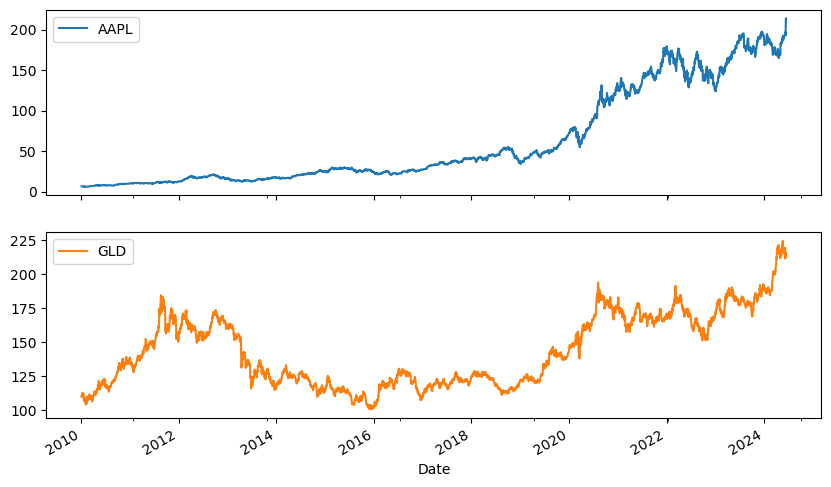

In [6]:
import matplotlib.pyplot as plt

f_df.plot(figsize=(10, 6), subplots=True)
plt.show()

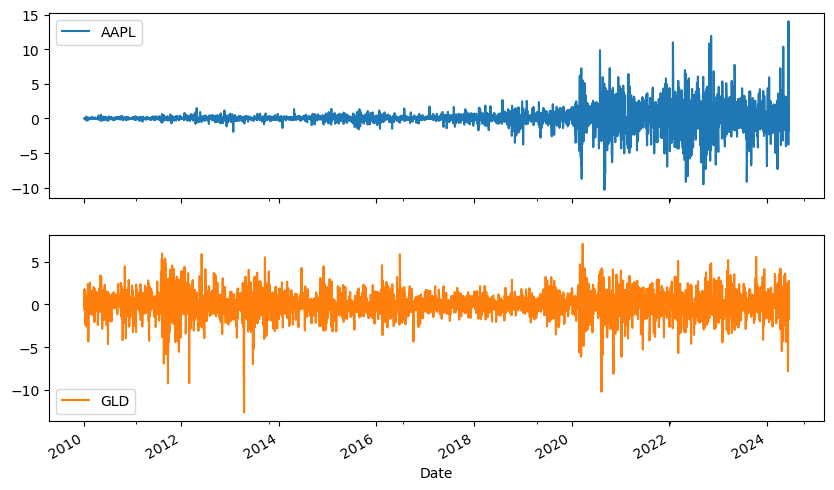

In [7]:
f_df.diff().plot(figsize=(10, 6), subplots=True)
plt.show()

### 주식현황그래프 & 차분 그래프 시각화  
- 분석 결과 금, 애플 모두 우연변동 형태의 그래프를 보이지만, 시간이 지날수록 두 그래프 모두 상승세를 보일 것으로 판단됩니다.
- 분산 그래프의 경우 애플과 같은 대기업은 분산이 일정하지 않아서, 안정성이 떨어지는 모습을 보입니다. 그에 반해 금의 경우, 애플에 비해 분산의 차이가 크지 않기때문에, 이 부분을 참고하여 안정성이 애플보다는 높다는 것을 알 수 있습니다.

### APPLE & GOLD 변화율 시각화

<Axes: xlabel='Ticker'>

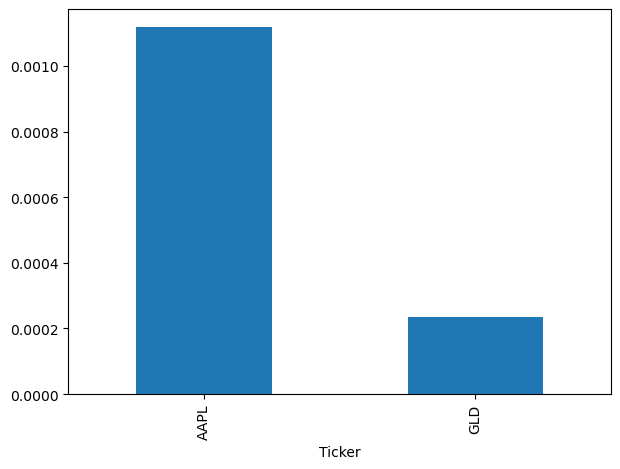

In [8]:
f_df.pct_change().mean().plot(kind='bar', figsize=(7, 5))

#### 시각화 결과  
- 변화율 그래프를 시각화한 결과 역시 APPLE 기업의 분산의 변화폭이 높은 것을 알 수 있으며, 금은 그에 비해 안정적임을 확인 할 수 있습니다.

### 💡 First Visualization  
> 과거데이터를 기점으로 현재 데이터와 비교하여 수익률을 시각화 하겠습니다.

In [10]:
display(f_df.shift(1).head(4))
display(f_df.head(4))
display(f_df.shift(-1).head(4))

Ticker,AAPL,GLD
Date,,
2010-01-04,NaN,NaN
2010-01-05,6.4707,109.80
2010-01-06,6.4819,109.70
2010-01-07,6.3788,111.51


Ticker,AAPL,GLD
Date,,
2010-01-04,6.4707,109.80
2010-01-05,6.4819,109.70
2010-01-06,6.3788,111.51
2010-01-07,6.3670,110.82


Ticker,AAPL,GLD
Date,,
2010-01-04,6.4819,109.70
2010-01-05,6.3788,111.51
2010-01-06,6.3670,110.82
2010-01-07,6.4094,111.37


In [9]:
import numpy as np

rate_f_df = np.log(f_df / f_df.shift(1))
rate_f_df

Ticker,AAPL,GLD
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.001729,-0.000911
2010-01-06,-0.016034,0.016365
2010-01-07,-0.001852,-0.006207
2010-01-08,0.006637,0.004951
...,...,...
2024-06-10,-0.019333,0.009126
2024-06-11,0.070131,0.002853
2024-06-12,0.028178,0.002658


<Axes: xlabel='Date'>

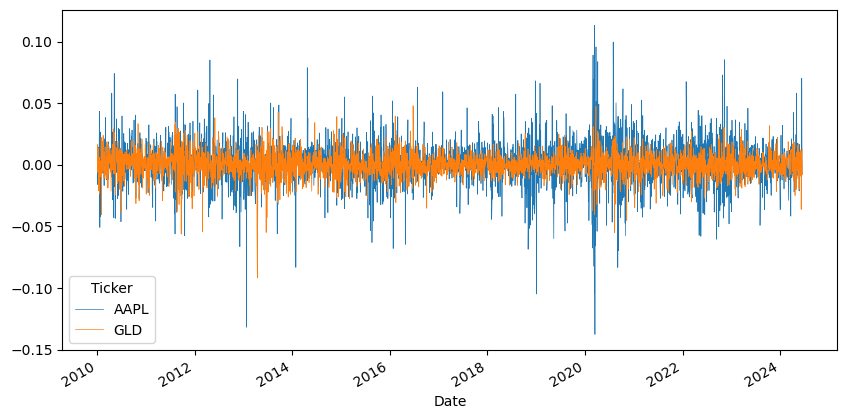

In [11]:
rate_f_df.plot(figsize=(10, 5), lw=0.5)

#### 위 시각화 그래프를 통해 금과 애플 간의 수익률 분산 차이를 더 뚜렷하게 볼 수 있었습니다.

In [12]:
# 연율화
# 연간 영업일(약 252일로 계산)
rate_f_df.mean() * 252

Ticker
AAPL    0.241993
GLD     0.046808
dtype: float64

In [13]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [14]:
rate_f_df = rate_f_df.dropna()
get_vif(rate_f_df)

,vif_score,feature
0,1.002698,AAPL
1,1.002698,GLD


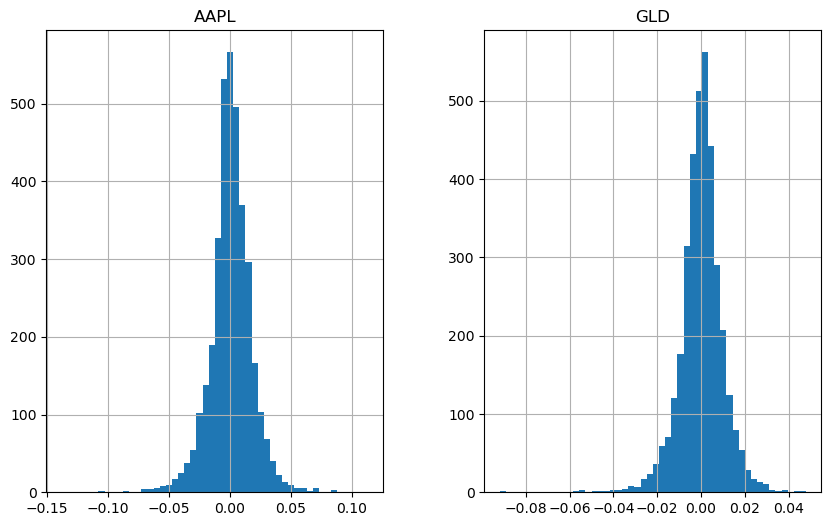

In [16]:
rate_f_df.hist(figsize=(10, 6), bins=50)
plt.show()

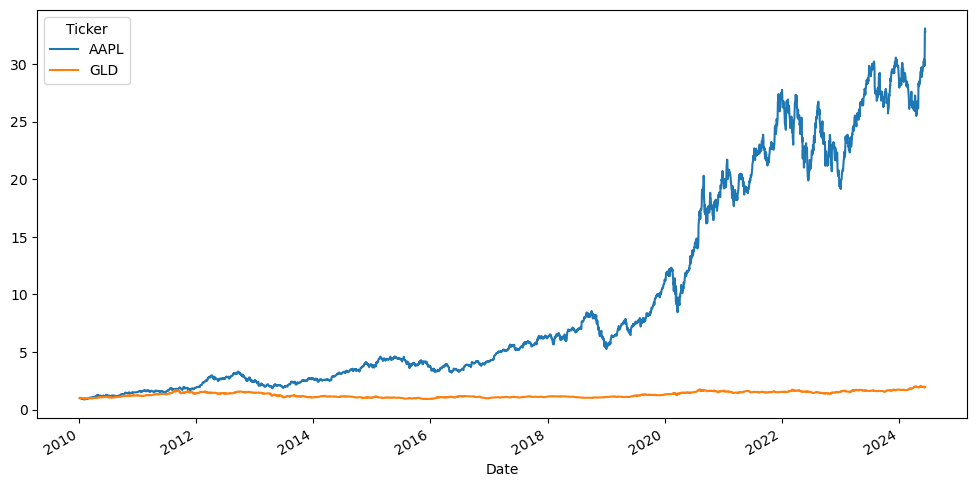

In [17]:
# 일간 수익률
rate_f_df.cumsum().apply(np.exp).plot(figsize=(12, 6))
plt.show()

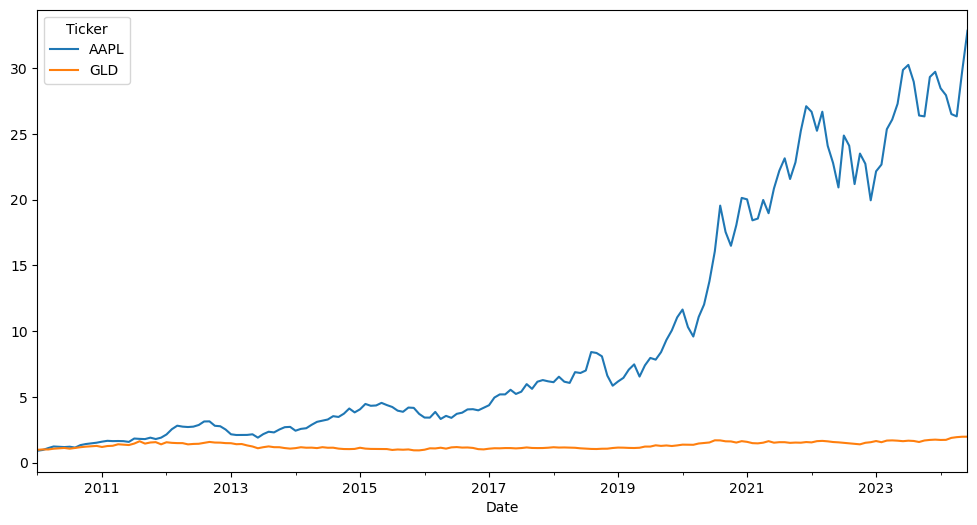

In [18]:
# 월간 수익률 (exp -> exponential function 지수형태로 변경)
rate_f_df.cumsum().apply(np.exp).resample('1m').last().plot(figsize=(12, 6))
plt.show()

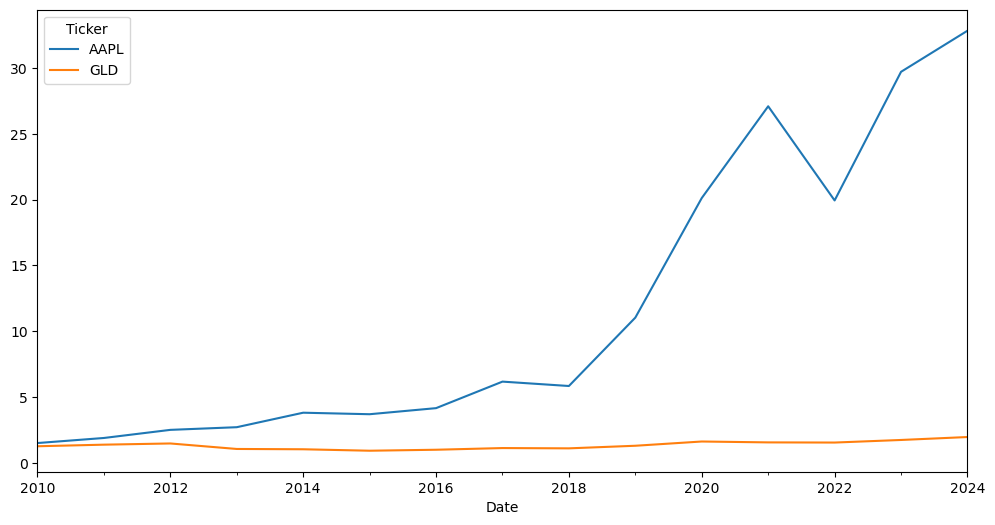

In [19]:
# 연간 수익률 (exp -> exponential function 지수형태로 변경)
rate_f_df.cumsum().apply(np.exp).resample('1Y').last().plot(figsize=(12, 6))
plt.show()

In [51]:
gld_df = f_df[['GLD']].dropna()
gld_df

Ticker,GLD
Date,
2010-01-04,109.80
2010-01-05,109.70
2010-01-06,111.51
2010-01-07,110.82
2010-01-08,111.37
...,...
2024-06-10,213.54
2024-06-11,214.15
2024-06-12,214.72


In [40]:
app_df = f_df[['AAPL']].dropna()
app_df

Ticker,AAPL
Date,
2010-01-04,6.4707
2010-01-05,6.4819
2010-01-06,6.3788
2010-01-07,6.3670
2010-01-08,6.4094
...,...
2024-06-10,193.1200
2024-06-11,207.1500
2024-06-12,213.0700


#### APPLE 이동평균 = 20

In [50]:
# 이동평균 구하기 
window = 20 

app_df['min'] = app_df['AAPL'].rolling(window=window).min()
app_df['mean'] = app_df['AAPL'].rolling(window=window).mean()
app_df['std'] = app_df['AAPL'].rolling(window=window).std()
app_df['median'] = app_df['AAPL'].rolling(window=window).median()
app_df['max'] = app_df['AAPL'].rolling(window=window).max()

app_df.dropna()

Ticker,AAPL,min,mean,std,median,max
Date,,,,,,
2010-02-01,5.8878,5.8071,6.260780,0.197617,6.31170,6.5019
2010-02-02,5.9220,5.8071,6.233345,0.204894,6.28825,6.5019
2010-02-03,6.0239,5.8071,6.210445,0.201213,6.28300,6.5019
2010-02-04,5.8068,5.8068,6.181845,0.216123,6.25365,6.5019
2010-02-05,5.9099,5.8068,6.158990,0.219653,6.22655,6.5019
...,...,...,...,...,...,...
2024-06-10,193.1200,186.2800,191.342500,2.859656,190.97000,196.8900
2024-06-11,207.1500,186.8800,192.386000,4.339811,191.16500,207.1500
2024-06-12,213.0700,186.8800,193.668000,6.190998,191.77000,213.0700


#### 금 이동평균 = 20

In [53]:
# 이동평균 구하기 
window = 20 

gld_df['min'] = gld_df['GLD'].rolling(window=window).min()
gld_df['mean'] = gld_df['GLD'].rolling(window=window).mean()
gld_df['std'] = gld_df['GLD'].rolling(window=window).std()
gld_df['median'] = gld_df['GLD'].rolling(window=window).median()
gld_df['max'] = gld_df['GLD'].rolling(window=window).max()

gld_df.dropna()

Ticker,GLD,min,mean,std,median,max
Date,,,,,,
2010-02-01,108.35,105.96,109.4165,2.150690,109.750,112.85
2010-02-02,109.13,105.96,109.3830,2.149620,109.415,112.85
2010-02-03,108.70,105.96,109.3330,2.153485,109.035,112.85
2010-02-04,104.37,104.37,108.9760,2.355905,108.820,112.85
2010-02-05,104.68,104.37,108.6690,2.498692,108.525,112.85
...,...,...,...,...,...,...
2024-06-10,213.54,211.60,218.0285,3.457245,217.520,224.56
2024-06-11,214.15,211.60,217.9230,3.545129,217.520,224.56
2024-06-12,214.72,211.60,217.7545,3.616150,216.895,224.56


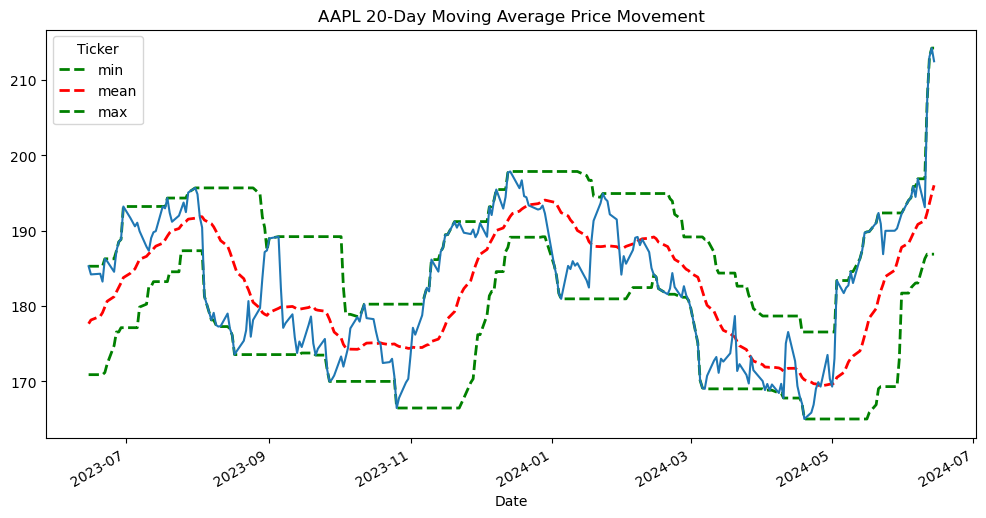

In [69]:
import matplotlib.pyplot as plt

ax = app_df[['min', 'mean', 'max']].iloc[-252:].plot(figsize=(12, 6), style=['g--', 'r--', 'g--'], lw=2)
app_df['AAPL'].iloc[-252:].plot(ax=ax)
plt.title("AAPL 20-Day Moving Average Price Movement")
plt.show()

### 20일간 애플 평균 주식 변동 추이 (23년 ~ 24년)

- 위 그래프를 보면 대체적으로 이동평균 값에 맞게 실제 애플 주식의 그래프가 잘 안착된 것을 볼 수 있다. 
- 그리고, 24년 06월쯤에 애플 주식이 큰 상승폭을 보이는 것을 알 수 있는데, 실제 애플 주식도 마찬가지로 24년 06월 12일을 기점으로 높은 상승폭을 보이는 것을 알 수 있다. (밑에 이미지 참고)
  
<img src='./images/apple.png' width="600px">  

> 추가적으로, 애플의 경우, 1년 기준으로 그래프를 보았을 때, 23년 8월부터 11월 까지 하락폭이 있었으며, 그 이후로 상승하다가, 다시 24년 2~3월 경에 다시 큰폭으로 하락하는것을 볼 수 있으며, 다시 5월부터 큰 상승폭으로 이동하는 흐름이 보입니다.
>
>
> 이전 차분그래프를 보았을 때도, 분산이 일정하지 않고 안정성이 떨어져보이는 형태를 보였습니다. 이를 통해 애플의 경우 수익률이 일정하지 않고, 큰 폭으로 변화되는 것을 알 수 있으므로, 투자할 때 이 부분을 참고해야합니다.

### 20일간 금 주식 이동평균 그래프 시각화

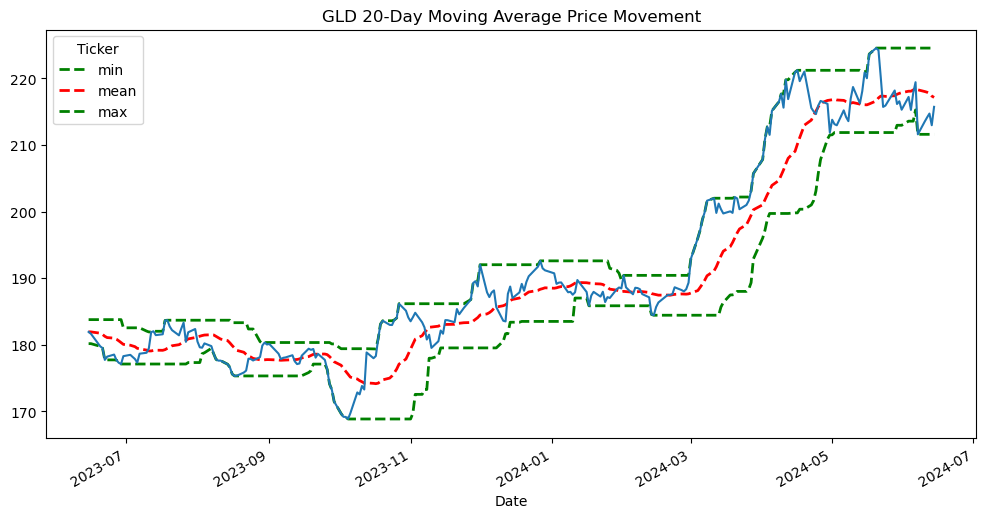

In [70]:
import matplotlib.pyplot as plt

ax = gld_df[['min', 'mean', 'max']].iloc[-252:].plot(figsize=(12, 6), style=['g--', 'r--', 'g--'], lw=2)
gld_df['GLD'].iloc[-252:].plot(ax=ax)
plt.title("GLD 20-Day Moving Average Price Movement")
plt.show()

#### 금 주식도 마찬가지로 최소,최대,중앙 값의 범위에 잘 안착되어 있는 것을 확인 할 수 있다.  

In [73]:
# SMA(Simple Moving Average): 일정 기간동안의 가격의 평균을 나타내는 보조지표
# 1달 영업일을 21일로 가정, 1년 영업일을 252일로 가정

app_df['SMA1'] = app_df['AAPL'].rolling(window=21).mean() #short-term
app_df['SMA2'] = app_df['AAPL'].rolling(window=252).mean() #long-term
display(app_df[['AAPL', 'SMA1', 'SMA2']].tail())

gld_df['SMA1'] = gld_df['GLD'].rolling(window=21).mean()
gld_df['SMA2'] = gld_df['GLD'].rolling(window=252).mean()
gld_df[['GLD', 'SMA1', 'SMA2']].tail()

Ticker,AAPL,SMA1,SMA2
Date,,,
2024-06-10,193.12,190.947619,182.504919
2024-06-11,207.15,192.095238,182.611672
2024-06-12,213.07,193.370952,182.730731
2024-06-13,214.24,194.647619,182.856331
2024-06-14,212.49,195.731905,182.972456


Ticker,GLD,SMA1,SMA2
Date,,,
2024-06-10,213.54,218.060952,190.648651
2024-06-11,214.15,217.843810,190.776071
2024-06-12,214.72,217.770476,190.906389
2024-06-13,212.97,217.526667,191.035079
2024-06-14,215.73,217.280952,191.174325


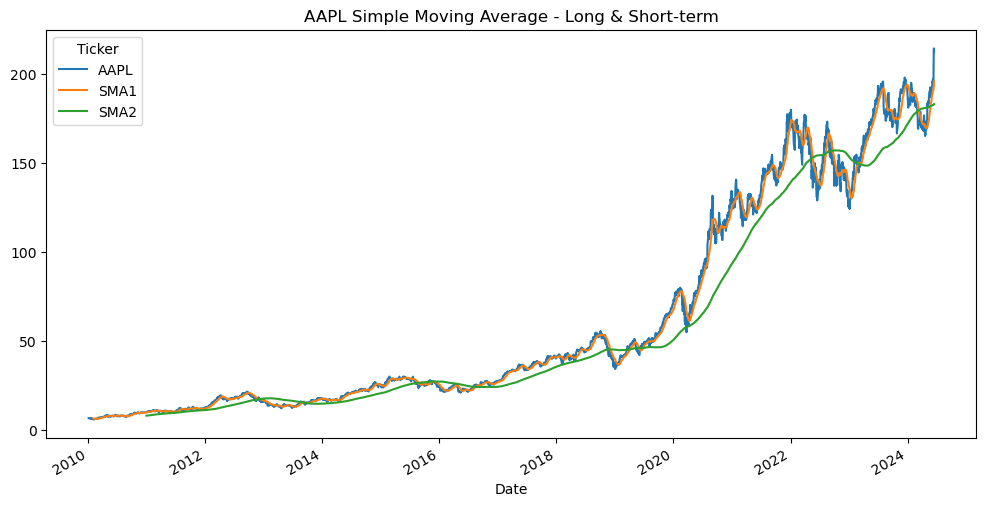

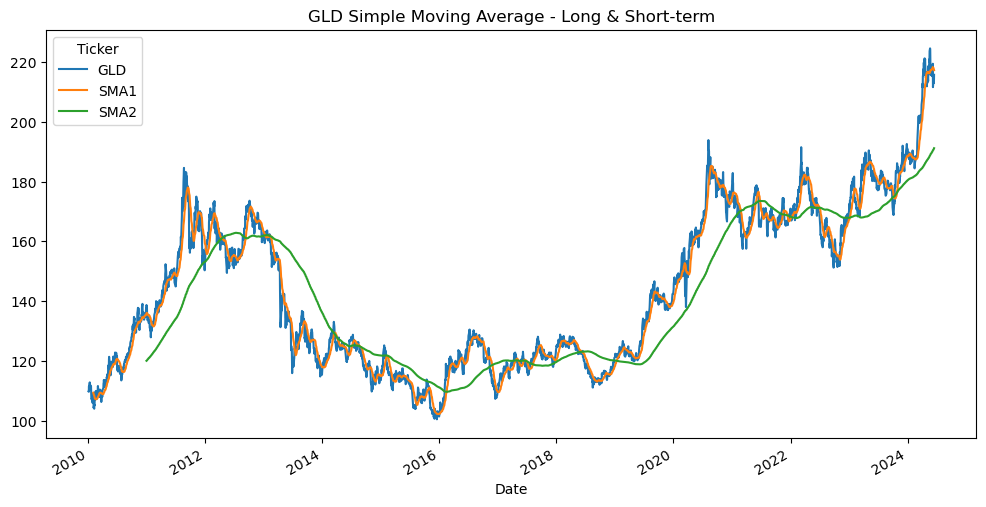

In [75]:
app_df[['AAPL', 'SMA1', 'SMA2']].plot(figsize=(12, 6))
plt.title("AAPL Simple Moving Average - Long & Short-term")

gld_df[['GLD', 'SMA1', 'SMA2']].plot(figsize=(12, 6))
plt.title("GLD Simple Moving Average - Long & Short-term")
plt.show()

### 애플 주가 기술 분석 
> 1달 영업일 수익률이 1년 영업 수익률보다 클 경우, 매수하고 반대일 시 매도 하는 전략으로
>
> 골든 크로스, 데드 크로스를 구축하겠습니다.

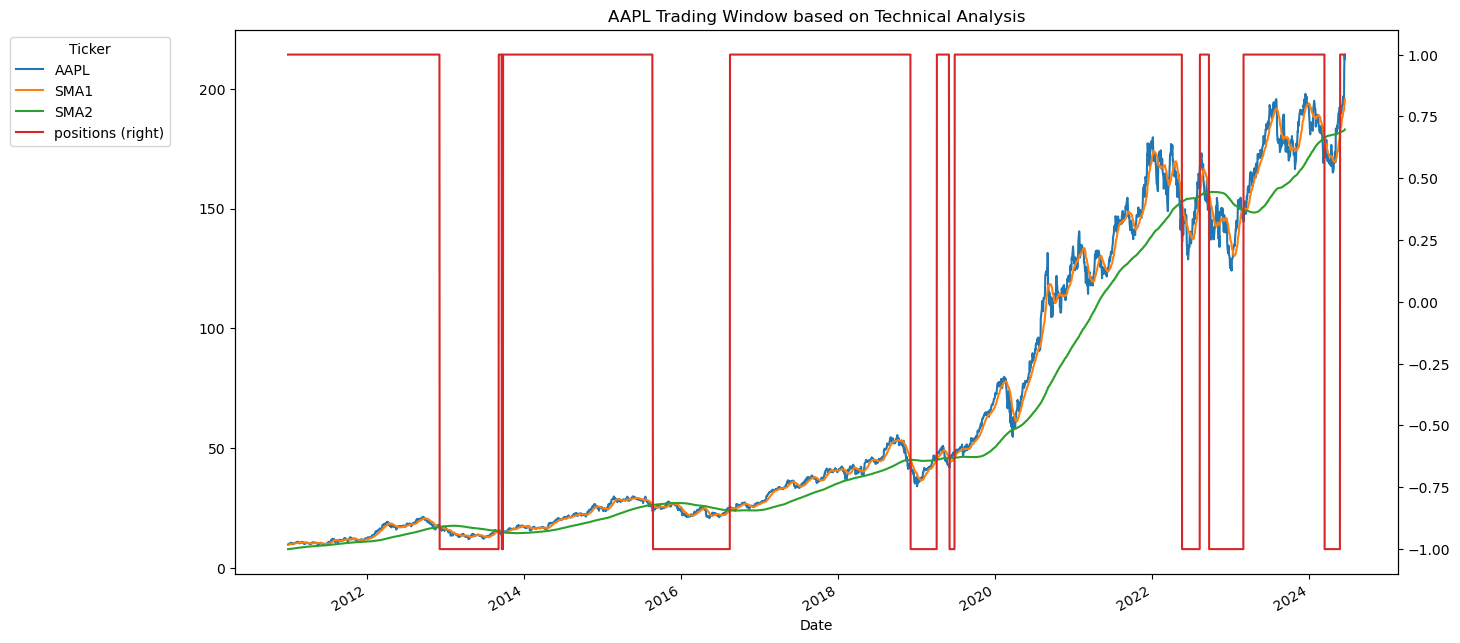

In [80]:
# 애플 주가 기술 분석
# 골든 크로스, 데드 크로스
app_df.dropna(inplace=True)

app_df['positions'] = np.where(app_df['SMA1'] > app_df['SMA2'], 1, -1)  # 1: buy , -1: sell /

ax = app_df[['AAPL', 'SMA1', 'SMA2', 'positions']].plot(figsize=(15, 8), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((-0.05, 1))

plt.title("AAPL Trading Window based on Technical Analysis")
plt.show()

### 금 주가 기술 분석 
> 1달 영업일 수익률이 1년 영업 수익률보다 클 경우, 매수하고 반대일 시 매도 하는 전략으로
>
> 골든 크로스, 데드 크로스를 구축하겠습니다.

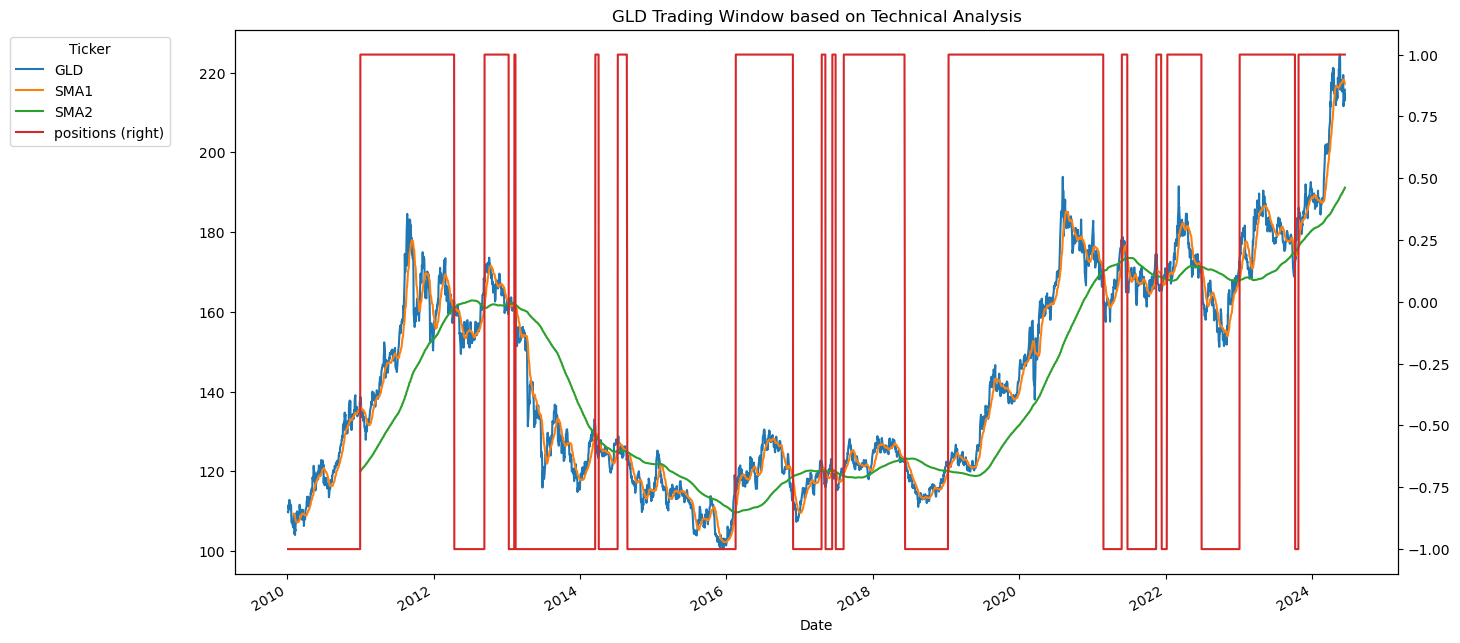

In [81]:
# 금 주가 기술 분석
# 골든 크로스, 데드 크로스
app_df.dropna(inplace=True)

gld_df['positions'] = np.where(gld_df['SMA1'] > gld_df['SMA2'], 1, -1)  # 1: buy , -1: sell /

ax = gld_df[['GLD', 'SMA1', 'SMA2', 'positions']].plot(figsize=(15, 8), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((-0.05, 1))

plt.title("GLD Trading Window based on Technical Analysis")
plt.show()

### 💡 전체 시각화 분석 결론 
> 전체적으로 애플 주식과 금 주식에 관한 시각화 분석내용을 통해 알 수 있는 점은 다음과 같습니다.

>**금(Gold, GLD)**
> 
> 금의 경우 애플에 비해, 수익률 측면에서 큰 변화폭은 없으며, 적은 수익률 그래프인것을 알 수 있지만, 금 자체만으로 보았을 때는, 미래로 갈 수록, 꾸준히 상승하는 추세를 보일 것으로 예상됩니다.
>
> 또한 금의 경우 애플에 비해 분산폭이 일정하기 때문에, 애플 주식 투자에 비해서는 안정적이라고 판단할 수 있습니다.
>

>**애플(Apple, AAPL)**
>
> 애플의 경우, 차분 그래프를 분석한 결과, 분산이 위아래로 큰 폭으로 차이가 나는 부분이 있었습니다.
>
> 안정성 측면에서 금에 비해 불안정한 것을 알 수 있습니다.
>
> 애플의 수익률 변동은 아이폰, 애플워치, 맥북, iOS와 같은 주요 제품들의 출시에 따라 크게 영향을 받는 것으로 추론할 수 있습니다.

**이와 같은 분석 결과를 바탕으로, 금과 애플 주식의 투자 특성과 리스크를 이해할 수 있습니다. 금은 비교적 안정적인 투자처로, 애플 주식은 높은 변동성을 가지며 제품 출시와 같은 외부 요인에 크게 영향을 받는다는 점에서 차이가 있습니다.**

### ARIMA 모델을 사용한 모델 평가 진행

In [92]:
apple_df = f_df['AAPL']
apple_df.info()

gold_df = f_df['GLD']
gold_df.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 3637 entries, 2010-01-04 to 2024-06-14
Series name: AAPL
Non-Null Count  Dtype  
--------------  -----  
3637 non-null   float64
dtypes: float64(1)
memory usage: 185.9 KB
<class 'pandas.core.series.Series'>
DatetimeIndex: 3637 entries, 2010-01-04 to 2024-06-14
Series name: GLD
Non-Null Count  Dtype  
--------------  -----  
3637 non-null   float64
dtypes: float64(1)
memory usage: 185.9 KB


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


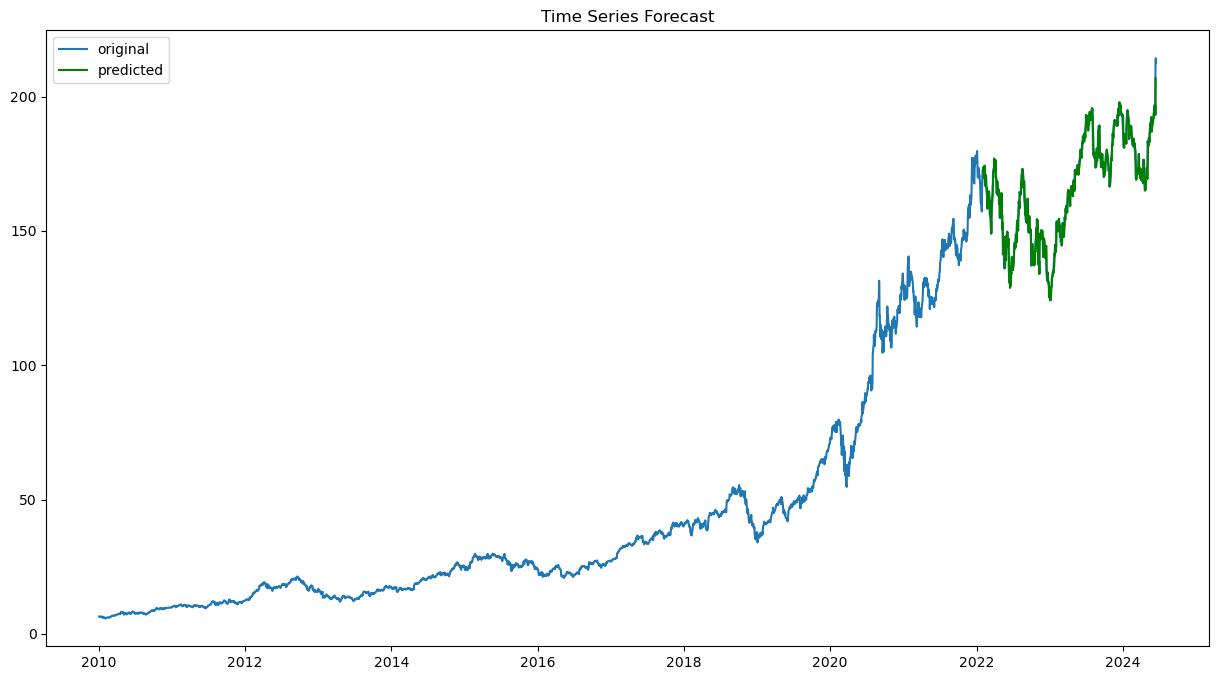

In [95]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

model = ARIMA(apple_df, order=(1,1,1))
model_fit = model.fit()

start_index = pd.to_datetime('2022-02-01')
end_index = pd.to_datetime('2024-06-12')
forecast = model_fit.predict(start=start_index, end=end_index)

plt.figure(figsize=(15, 8))
plt.plot(apple_df, label='original')
plt.plot(forecast, label='predicted', c='green')
plt.title("Time Series Forecast")
plt.legend()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


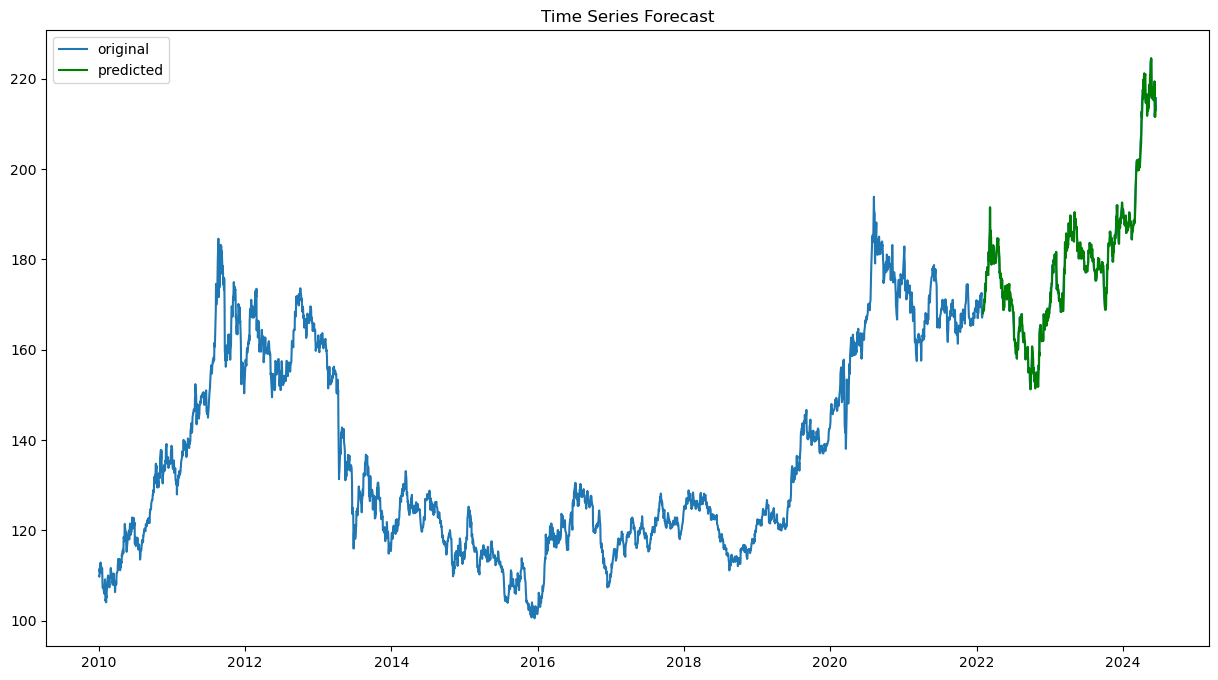

In [100]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

model = ARIMA(gold_df, order=(1,1,1))
model_fit = model.fit()

start_index = pd.to_datetime('2022-02-01')
end_index = pd.to_datetime('2024-06-12')
forecast = model_fit.predict(start=start_index, end=end_index)

plt.figure(figsize=(15, 8))
plt.plot(gold_df, label='original')
plt.plot(forecast, label='predicted', c='green')
plt.title("Time Series Forecast")
plt.legend()
plt.show()

In [99]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

mse = mean_squared_error(apple_df['2022-02-01':'2024-06-12'], forecast)
print("Mean Squared Error", mse)

msle = mean_squared_log_error(apple_df['2022-02-01':'2024-06-12'], forecast)
print("Mean Squared Error", msle)

Mean Squared Error 7.915560666494476
Mean Squared Error 0.00030907666392508503


In [102]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

mse = mean_squared_error(gold_df['2022-02-01':'2024-06-12'], forecast)
print("Mean Squared Error", mse)

msle = mean_squared_log_error(gold_df['2022-02-01':'2024-06-12'], forecast)
print("Mean Squared Error", msle)

Mean Squared Error 2.73109788943278
Mean Squared Error 8.168467616492357e-05


### 💡 ARIMA 모델 평가 결과
- **애플(AAPL)**
- > 애플의 경우, 손실율이 약 0.03%로 매우 낮고, MSE 값이 7 정도로 손실값 차이가 크지 않기 때문에, 예측에 있어서 매우 훌륭한 성능을 보여주었습니다. 이는 ARIMA 모델이 애플 주식의 변동성을 효과적으로 예측할 수 있음을 나타냅니다.

- **금(GLD)**
- > 금의 경우에도 손실율이 매우 낮습니다. MSLE 값이 0.008%로 금의 예측에서도 ARIMA 모델이 안정적이고 신뢰할 수 있는 성능을 보여주었습니다. MSE 값 또한 2.73으로 예측 오차가 비교적 작아, 금의 가격 변동을 예측하는 데 있어서 ARIMA 모델의 유효성을 확인할 수 있었습니다.

#### 결론 
> ARIMA 모델을 사용하여 애플과 금의 주가를 예측한 결과, 두 자산 모두에서 낮은 손실율과 예측 오차를 보였습니다. 이는 ARIMA 모델이 두 자산의 시계열 데이터를 효과적으로 예측할 수 있음을 의미합니다. 특히, 애플 주식의 변동성을 잘 포착했으며, 금의 경우에도 안정적인 예측 결과를 나타냈습니다. 따라서, ARIMA 모델은 애플과 금과 같은 금융 자산의 시계열 예측에 유용한 도구임을 확인할 수 있었습니다.

### DeepLearning Propet 모델 사용하여, 미래 데이터 예측 

In [158]:
apple_df = f_df[['AAPL']].iloc[-600:]
apple_df

Ticker,AAPL
Date,
2022-01-26,157.6848
2022-01-27,157.2207
2022-01-28,168.1912
2022-01-31,172.5854
2022-02-01,172.4175
...,...
2024-06-10,193.1200
2024-06-11,207.1500
2024-06-12,213.0700


In [211]:
gold_df = f_df[['GLD']].iloc[-600:]
gold_df

Ticker,GLD
Date,
2022-01-26,169.79
2022-01-27,167.60
2022-01-28,167.10
2022-01-31,168.09
2022-02-01,168.23
...,...
2024-06-10,213.54
2024-06-11,214.15
2024-06-12,214.72


#### 훈련 데이터, 테스트 데이터 분리 진행 

In [160]:
app_train = apple_df['AAPL'][:int(0.8 * len(apple_df))]
app_test = apple_df['AAPL'][int(0.8 * len(apple_df)):]

In [212]:
gld_train = gold_df['GLD'][:int(0.8 * len(gold_df))]
gld_test = gold_df['GLD'][int(0.8 * len(gold_df)):]

<Axes: xlabel='Date'>

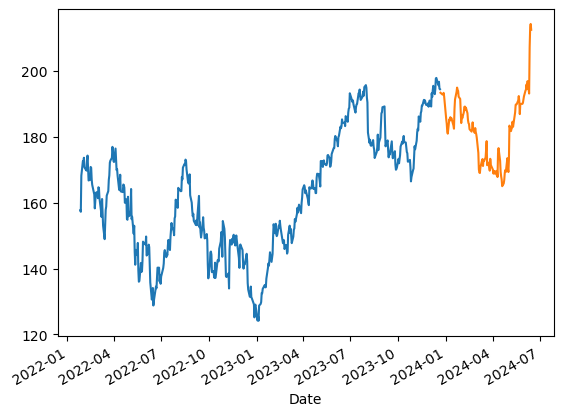

In [162]:
app_train.plot()
app_test.plot()

<Axes: xlabel='Date'>

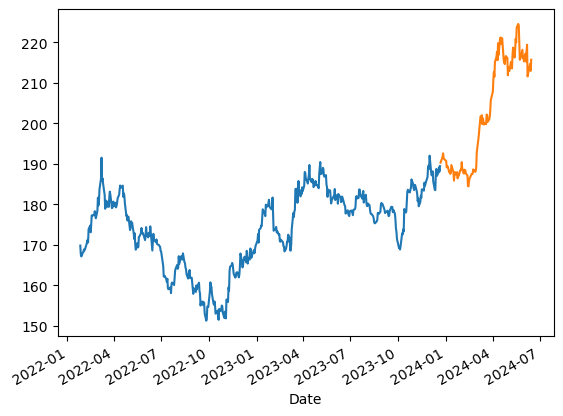

In [213]:
gld_train.plot()
gld_test.plot()

In [164]:
from pmdarima.arima import ndiffs
# KPSS (Kwaiatkowski-Phillps-Schmidt)
# 치분을 진행하는 것이 필요할 지 결정하기 위해 사용하는 한 가지 검정 방법
# 영가설(귀무가설)을 "데이터에 정상성이 나타난다" 라고 설정한뒤,
# 영가설이 거짓이라는 증거를 찾는 알고리즘이다. 
kpass_diffs = ndiffs(app_train, alpha=0.05, test='kpss', max_d=9)
adf_diffs = ndiffs(app_train, alpha=0.05, test='adf', max_d=9)
pp_diffs = ndiffs(app_train, alpha=0.05, test='pp', max_d=9)

n_diffs = max(kpass_diffs, adf_diffs, pp_diffs)
print(f'애플 d = {n_diffs}')

애플 d = 1


In [214]:
from pmdarima.arima import ndiffs
# KPSS (Kwaiatkowski-Phillps-Schmidt)
# 치분을 진행하는 것이 필요할 지 결정하기 위해 사용하는 한 가지 검정 방법
# 영가설(귀무가설)을 "데이터에 정상성이 나타난다" 라고 설정한뒤,
# 영가설이 거짓이라는 증거를 찾는 알고리즘이다. 
kpass_diffs = ndiffs(gld_train, alpha=0.05, test='kpss', max_d=9)
adf_diffs = ndiffs(gld_train, alpha=0.05, test='adf', max_d=9)
pp_diffs = ndiffs(gld_train, alpha=0.05, test='pp', max_d=9)

n_diffs = max(kpass_diffs, adf_diffs, pp_diffs)
print(f'금 d = {n_diffs}')

금 d = 1


In [166]:
import pmdarima as pm

model = pm.auto_arima(y=app_train, d=1, start_p=0, max_p=3, start_q=0,
                     max_q=3, m=1, seasonal=True, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2368.605, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2370.602, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2370.602, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2366.950, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2365.845, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2372.342, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2366.848, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2370.363, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2370.359, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2368.533, Time=0.53 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2364.182, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2368.949, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2368.949, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2370.726, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [220]:
import pmdarima as pm

gld_model = pm.auto_arima(y=gld_train, d=1, start_p=0, max_p=3, start_q=0,
                     max_q=20, m=1, seasonal=True, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1801.599, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1803.388, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1803.339, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1799.921, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1803.270, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.347 seconds


In [168]:
model.fit(app_train)

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [221]:
gld_model.fit(gld_train)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [170]:
# portpolio 에 꼭 적자. 
# Prob(q) , 융-박스 검정 통계량 
# 영가설 : 잔차가 백색잡음 시계열을 따른다. 
# 0.05 이상 : 서로 독립이고 동일한 분포를 따른다. 

# Prob(H) , 이분산성 검정 통계량 
# 영가설 : 잔차가 이분산성을 띄지 않는다. 
# 0.05 이상 : 잔차의 분산이 일정하다.

# Prob(JB) , 자크-베라 검정 통계량  
# 영가설 : 잔차가 정규성을 따른다. 
# 0.05 이상 : 일정한 평균과 분산을 따른다. 

# Skew : 쏠린 정도, 왜도
# 0에 가까워야 한다.

# Kurtosis : 뾰족한 정도, 첨도
# 3에 가까워야 한다. 

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  480
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1179.091
Date:                Mon, 17 Jun 2024   AIC                           2364.182
Time:                        13:20:56   BIC                           2376.697
Sample:                             0   HQIC                          2369.101
                                - 480                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9085      0.053    -17.105      0.000      -1.013      -0.804
ma.L1          0.9598      0.041     23.535      0.000       0.880       1.040
sigma2         8.0437      0.399     20.160      0.0

#### 애플 주식 데이터 검정 통계량 분석 결과  
- 애플 주식의 경우, 융박스 검정 통계량(Prob(q))을 따져보았을 때, 0.4로, 어느정도 서로 독립적이고, 동일한 분포를 따르는 것을 알 수 있다.
- 이분산성 검정 통계량(Prob(H))을 보았을 때는, 0으로 잔차의 분산이 일정하지 않은 것을 볼 수 있었다.
- 자크-베라 검정 통계량(Prob (JB))과 같은 경우에도 0의 값이 나왔기 때문에, 해당 애플 주식 데이터가 일정한 평균과 분산을 따르지 않은 것을 알 수 있었다.
- Skew를 보았을 때는, -0.05로 0과 어느정도 가깝다 판단하였기 때문에, 왜도가 심하지 않은 것을 알 수 있었다.
- Kurtosis를 보았을 때는 4.61로 3과 어느정도 가깝기 때문에, 첨도 또한 심하진 않을 것으로 예상된다.

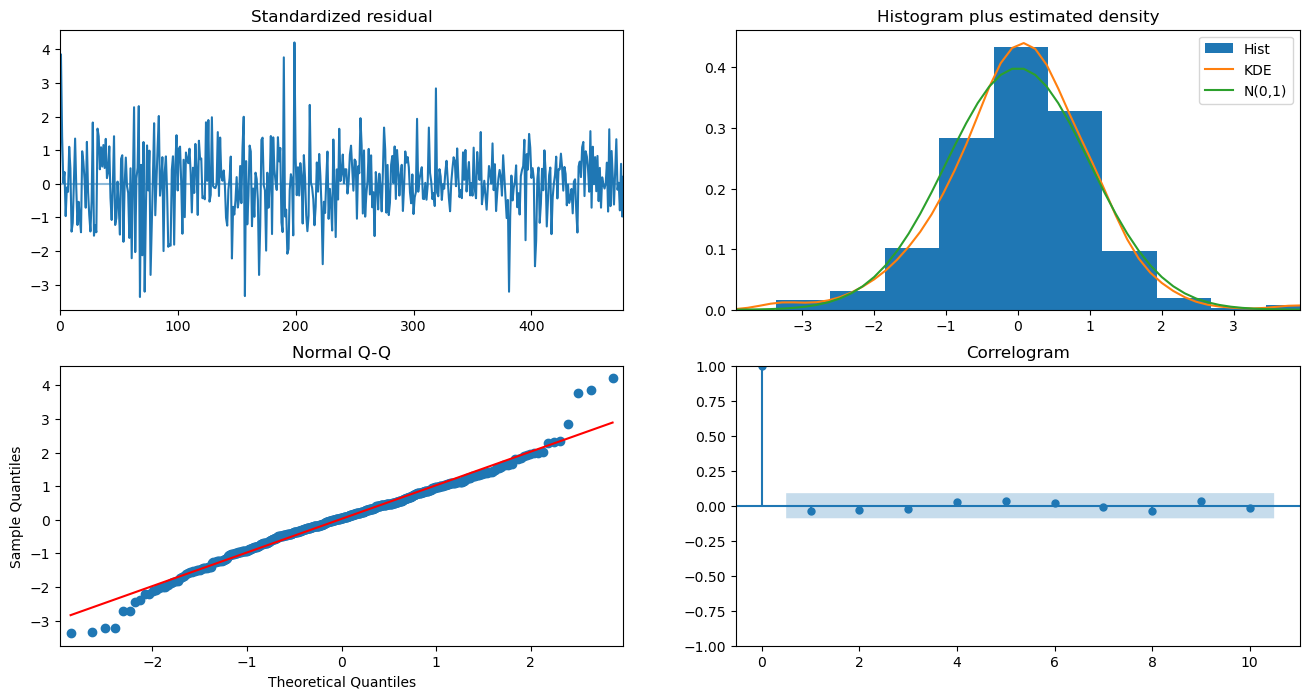

In [171]:
import matplotlib.pyplot as plt
model.plot_diagnostics(figsize=(16, 8))
plt.show()

#### 위 네번째 Correlogram을 보면, 1차 차분한 데이터에서의 상관관계들이 모두 적정값에 안착되어있으며, 정상적인 시계열 데이터 형태를 보인다.

In [172]:
print(gld_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  480
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -898.960
Date:                Mon, 17 Jun 2024   AIC                           1799.921
Time:                        13:20:56   BIC                           1804.093
Sample:                             0   HQIC                          1801.561
                                - 480                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.4983      0.133     18.791      0.000       2.238       2.759
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                19.34
Prob(Q):                              0.65   Pr

#### 금 주식 데이터 검정 통계량 분석 결과  
- 금 주식의 경우, 융박스 검정 통계량(Prob(q))을 따져보았을 때, 0.65로, 서로 독립적이고, 동일한 분포를 따르는 것을 알 수 있다.
- 이분산성 검정 통계량(Prob(H))을 보았을 때는, 0.04로 잔차의 분산이 일정하지 않을 것으로 예상된다.
- 자크-베라 검정 통계량(Prob (JB))과 같은 경우에는 0의 값이 나왔기 때문에, 해당 금 주식 데이터가 일정한 평균과 분산을 따르지 않은 것을 알 수 있었다.
- Skew를 보았을 때는, 0.16으로 0과 어느정도 가깝다 판단하였기 때문에, 왜도가 심하지 않은 것을 알 수 있었다.
- Kurtosis를 보았을 때는 3.93으로 3과 어느정도 가깝기 때문에, 첨도 또한 심하진 않을 것으로 예상된다.

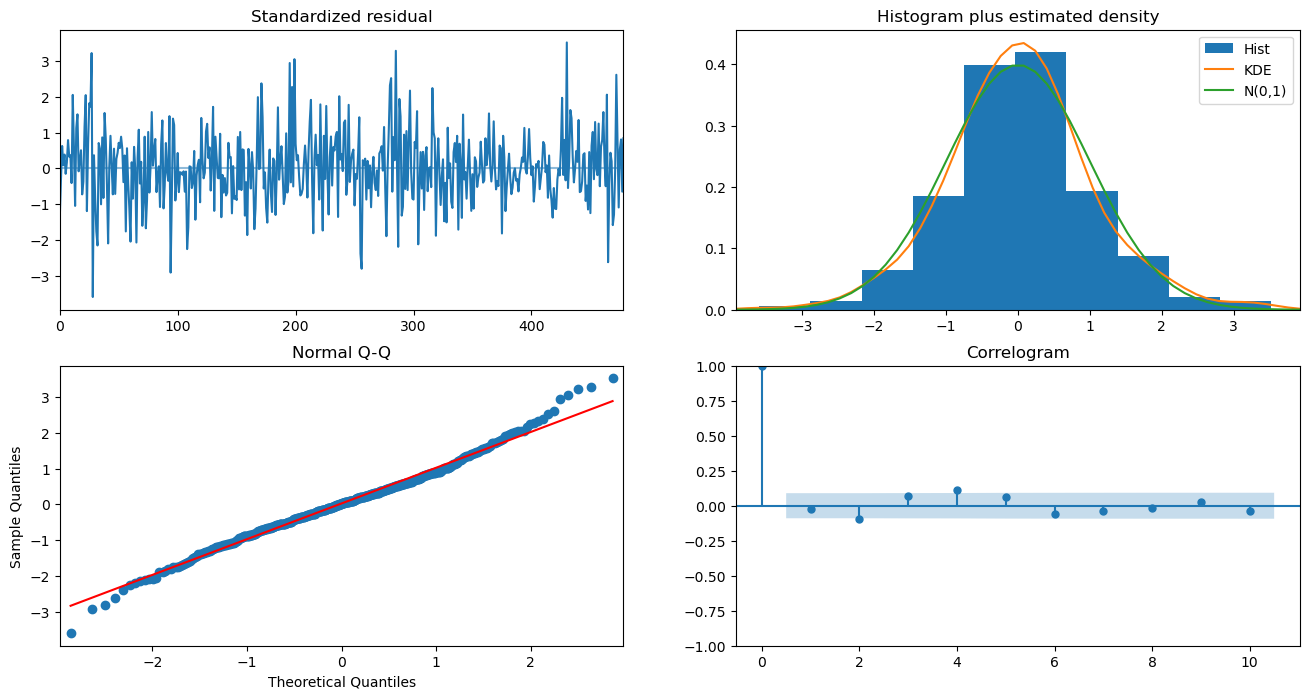

In [181]:
import matplotlib.pyplot as plt
gld_model.plot_diagnostics(figsize=(16, 8))
plt.show()

#### 위 네번째 Correlogram을 보면, 1차 차분한 데이터에서의 2번 상관관계 에서 적정값을 살짝 벗어나는 모습을 보이고 있으며,  
#### 이를 미루어보았을 때, 모델의 성능에 대한 추가적인 검토가 필요한 부분이지만, 전체적으로 시계열 데이터를 예측하는 데 있어서   
#### 매우 유효한 성능을 보이고 있으므로 일부 개선이 필요할 수 있지만, 전반적으로 신뢰할 수 있는 결과를 제공합니다.

In [174]:
app_train

Date
2022-01-26    157.6848
2022-01-27    157.2207
2022-01-28    168.1912
2022-01-31    172.5854
2022-02-01    172.4175
                ...   
2023-12-15    197.3182
2023-12-18    195.6404
2023-12-19    196.6890
2023-12-20    194.5817
2023-12-21    194.4319
Name: AAPL, Length: 480, dtype: float64

In [175]:
prediction = model.predict(n_periods = len(app_train))
prediction

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


480    195.136277
481    194.496350
482    195.077724
483    194.549546
484    195.029395
          ...    
955    194.800974
956    194.800974
957    194.800974
958    194.800974
959    194.800974
Length: 480, dtype: float64

In [223]:
gld_train

Date
2022-01-26    169.79
2022-01-27    167.60
2022-01-28    167.10
2022-01-31    168.09
2022-02-01    168.23
               ...  
2023-12-15    187.00
2023-12-18    187.85
2023-12-19    189.13
2023-12-20    188.10
2023-12-21    189.43
Name: GLD, Length: 480, dtype: float64

In [224]:
gld_prediction = gld_model.predict(n_periods= len(gld_train))
gld_prediction

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


480    189.43
481    189.43
482    189.43
483    189.43
484    189.43
        ...  
955    189.43
956    189.43
957    189.43
958    189.43
959    189.43
Length: 480, dtype: float64

In [183]:
# 신뢰구간 -> return_conf_int
prediction, conf_int = model.predict(n_periods=2, return_conf_int=True) 
print(conf_int)
print(prediction)
# 결과적으로 신뢰구간의 평균값으로 예측한다.

[[189.57753648 200.69501734]
 [186.43096052 202.56174036]]
480    195.136277
481    194.496350
dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [206]:
gld_prediction, gld_conf_int = gld_model.predict(n_periods=2, return_conf_int=True) 
print(gld_conf_int)
print(gld_prediction)

[[186.33208393 192.52791607]
 [185.04888508 193.81111492]]
480    189.43
481    189.43
dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [184]:
prediction.tolist()[0]

195.1362769093471

In [222]:
gld_prediction.tolist()[0]

189.43

In [185]:
# 실제 값을 알고 있을 때 사용
# 알 수 없는 데이터의 내용을 가지고 예측하는것이 아님.
def predict_one_step():
    prediction, conf_int = model.predict(n_periods=2, return_conf_int=True) 
    return (prediction.tolist()[0], conf_int.tolist()[0])

In [208]:
# 실제 값을 알고 있을 때 사용
# 알 수 없는 데이터의 내용을 가지고 예측하는것이 아님.
def predict_one_step():
    gld_prediction, gld_conf_int = gld_model.predict(n_periods=2, return_conf_int=True) 
    return (gld_prediction.tolist()[0], gld_conf_int.tolist()[0])

In [187]:
p_list = [] # Prediction
conf_int_lower = [] # 신뢰구간 min
cont_int_upper = [] # 신뢰구간 max

for data in app_test:
    p, c = predict_one_step()
    p_list.append(p)
    conf_int_lower.append(c[0])
    cont_int_upper.append(c[1])

    model.update(data)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [209]:
p_list = [] # Prediction
conf_int_lower = [] # 신뢰구간 min
cont_int_upper = [] # 신뢰구간 max

for data in gld_test:
    p, c = predict_one_step()
    p_list.append(p)
    conf_int_lower.append(c[0])
    cont_int_upper.append(c[1])

    model.update(data)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_predicti

In [188]:
app_predict_df = pd.DataFrame({"test" : app_test, "pred" : p_list})
app_predict_df

,test,pred
Date,,
2023-12-22,193.3533,195.136277
2023-12-26,192.8040,192.649561
2023-12-27,192.9038,193.453758
2023-12-28,193.3333,192.296234
2023-12-29,192.2846,193.926761
...,...,...
2024-06-10,193.1200,197.312724
2024-06-11,207.1500,192.589427
2024-06-12,213.0700,207.992359


In [210]:
gld_predict_df = pd.DataFrame({'test' : gld_test, "pred" : p_list})
gld_predict_df

,test,pred
Date,,
2023-12-22,190.27,189.43
2023-12-26,191.72,189.43
2023-12-27,192.59,189.43
2023-12-28,191.47,189.43
2023-12-29,191.17,189.43
...,...,...
2024-06-10,213.54,189.43
2024-06-11,214.15,189.43
2024-06-12,214.72,189.43


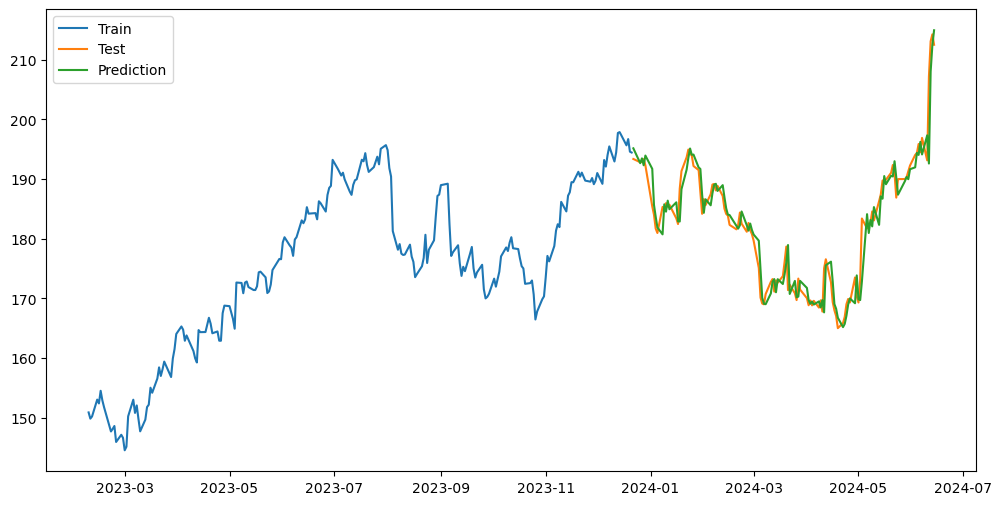

In [195]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

plt.plot(app_train.iloc[-220:], label='Train')
plt.plot(app_test.iloc[-220:], label='Test')
plt.plot(app_predict_df.pred, label='Prediction')
plt.legend()
plt.show()

In [199]:
import numpy as np

def MAPE(y_test, y_pred) :
    return np.mean(np.abs((app_test - y_pred) / app_test)) * 100

print(f'MAPE (%): {MAPE(app_test, p_list):.4f}')

MAPE (%): 1.0928


### 딥러닝 - Propet 사용

In [246]:
f_df = f_df['2022-01-01':]
f_df

Ticker,AAPL,GLD
Date,,
2022-01-03,179.7246,168.33
2022-01-04,177.4436,169.57
2022-01-05,172.7236,169.06
2022-01-06,169.8403,166.99
2022-01-07,170.0081,167.75
...,...,...
2024-06-10,193.1200,213.54
2024-06-11,207.1500,214.15
2024-06-12,213.0700,214.72


In [247]:
pre_a_df = f_df.reset_index()
pre_a_df

Ticker,Date,AAPL,GLD
0,2022-01-03,179.7246,168.33
1,2022-01-04,177.4436,169.57
2,2022-01-05,172.7236,169.06
3,2022-01-06,169.8403,166.99
4,2022-01-07,170.0081,167.75
...,...,...,...
611,2024-06-10,193.1200,213.54
612,2024-06-11,207.1500,214.15
613,2024-06-12,213.0700,214.72
614,2024-06-13,214.2400,212.97


In [248]:
pre_b_df = pre_a_df.drop(columns='GLD')
pre_b_df

Ticker,Date,AAPL
0,2022-01-03,179.7246
1,2022-01-04,177.4436
2,2022-01-05,172.7236
3,2022-01-06,169.8403
4,2022-01-07,170.0081
...,...,...
611,2024-06-10,193.1200
612,2024-06-11,207.1500
613,2024-06-12,213.0700
614,2024-06-13,214.2400


In [249]:
pre_b_df = pre_b_df.rename(columns={'Date':'ds'})
pre_b_df = pre_b_df.rename(columns={'AAPL':'y'})
pre_b_df

Ticker,ds,y
0,2022-01-03,179.7246
1,2022-01-04,177.4436
2,2022-01-05,172.7236
3,2022-01-06,169.8403
4,2022-01-07,170.0081
...,...,...
611,2024-06-10,193.1200
612,2024-06-11,207.1500
613,2024-06-12,213.0700
614,2024-06-13,214.2400


In [250]:
from prophet import Prophet

model = Prophet().fit(pre_b_df)

13:46:09 - cmdstanpy - INFO - Chain [1] start processing
13:46:09 - cmdstanpy - INFO - Chain [1] done processing


In [270]:
future = model.make_future_dataframe(periods=270)

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][100:]

,ds,yhat,yhat_lower,yhat_upper
100,2022-05-26,141.784840,137.062302,146.440875
101,2022-05-27,141.676997,136.636616,145.953472
102,2022-05-31,140.327886,135.763424,145.123852
103,2022-06-01,140.093284,135.698529,145.288861
104,2022-06-02,139.716160,134.717705,144.854605
...,...,...,...,...
881,2025-03-07,232.737218,-15.447724,487.245813
882,2025-03-08,232.149010,-17.740888,490.525187
883,2025-03-09,231.815986,-19.405195,490.046047
884,2025-03-10,231.604226,-22.071433,492.623685


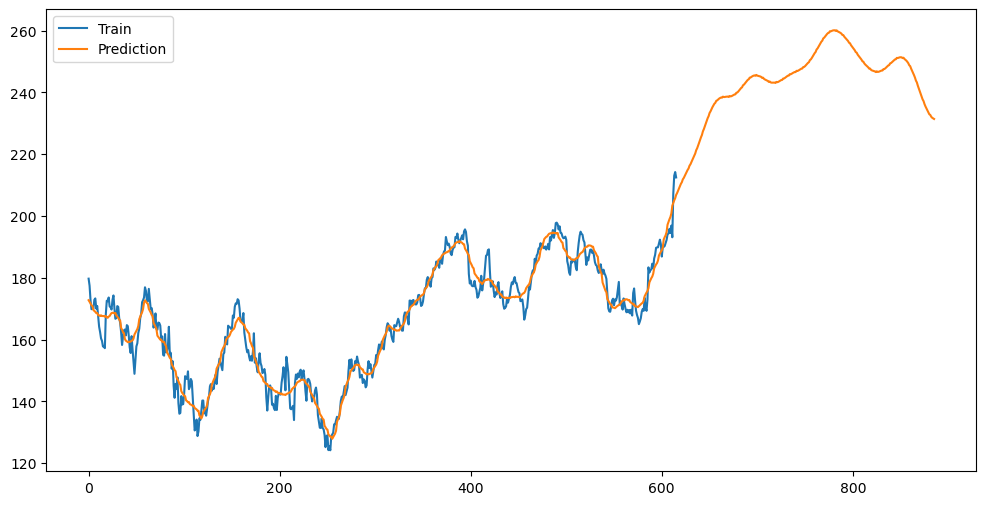

In [271]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

plt.plot(pre_b_df[['y']], label='Train')
plt.plot(forecast[['yhat']], label='Prediction')
plt.legend()
plt.show()

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


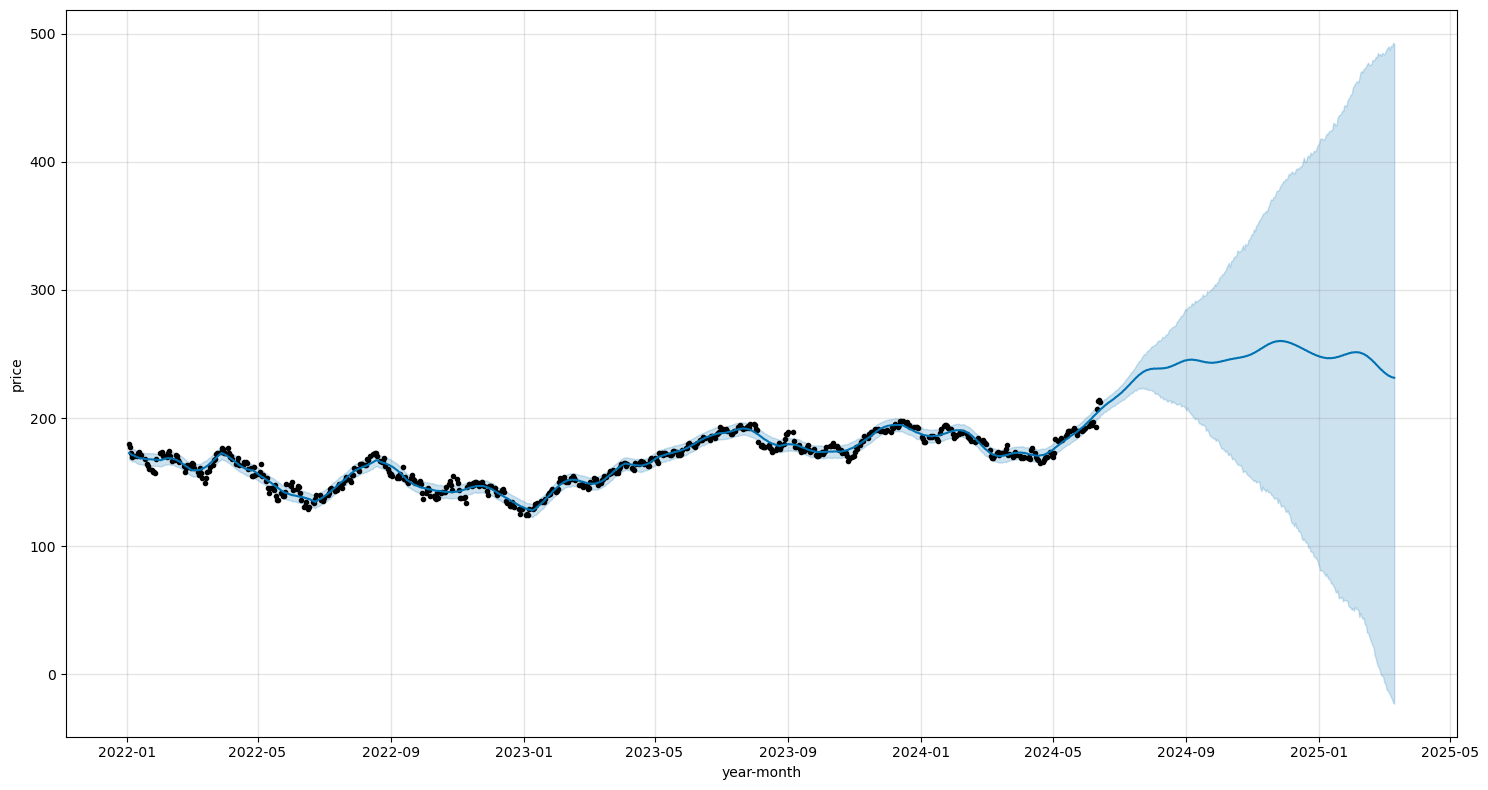

In [272]:
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects inste

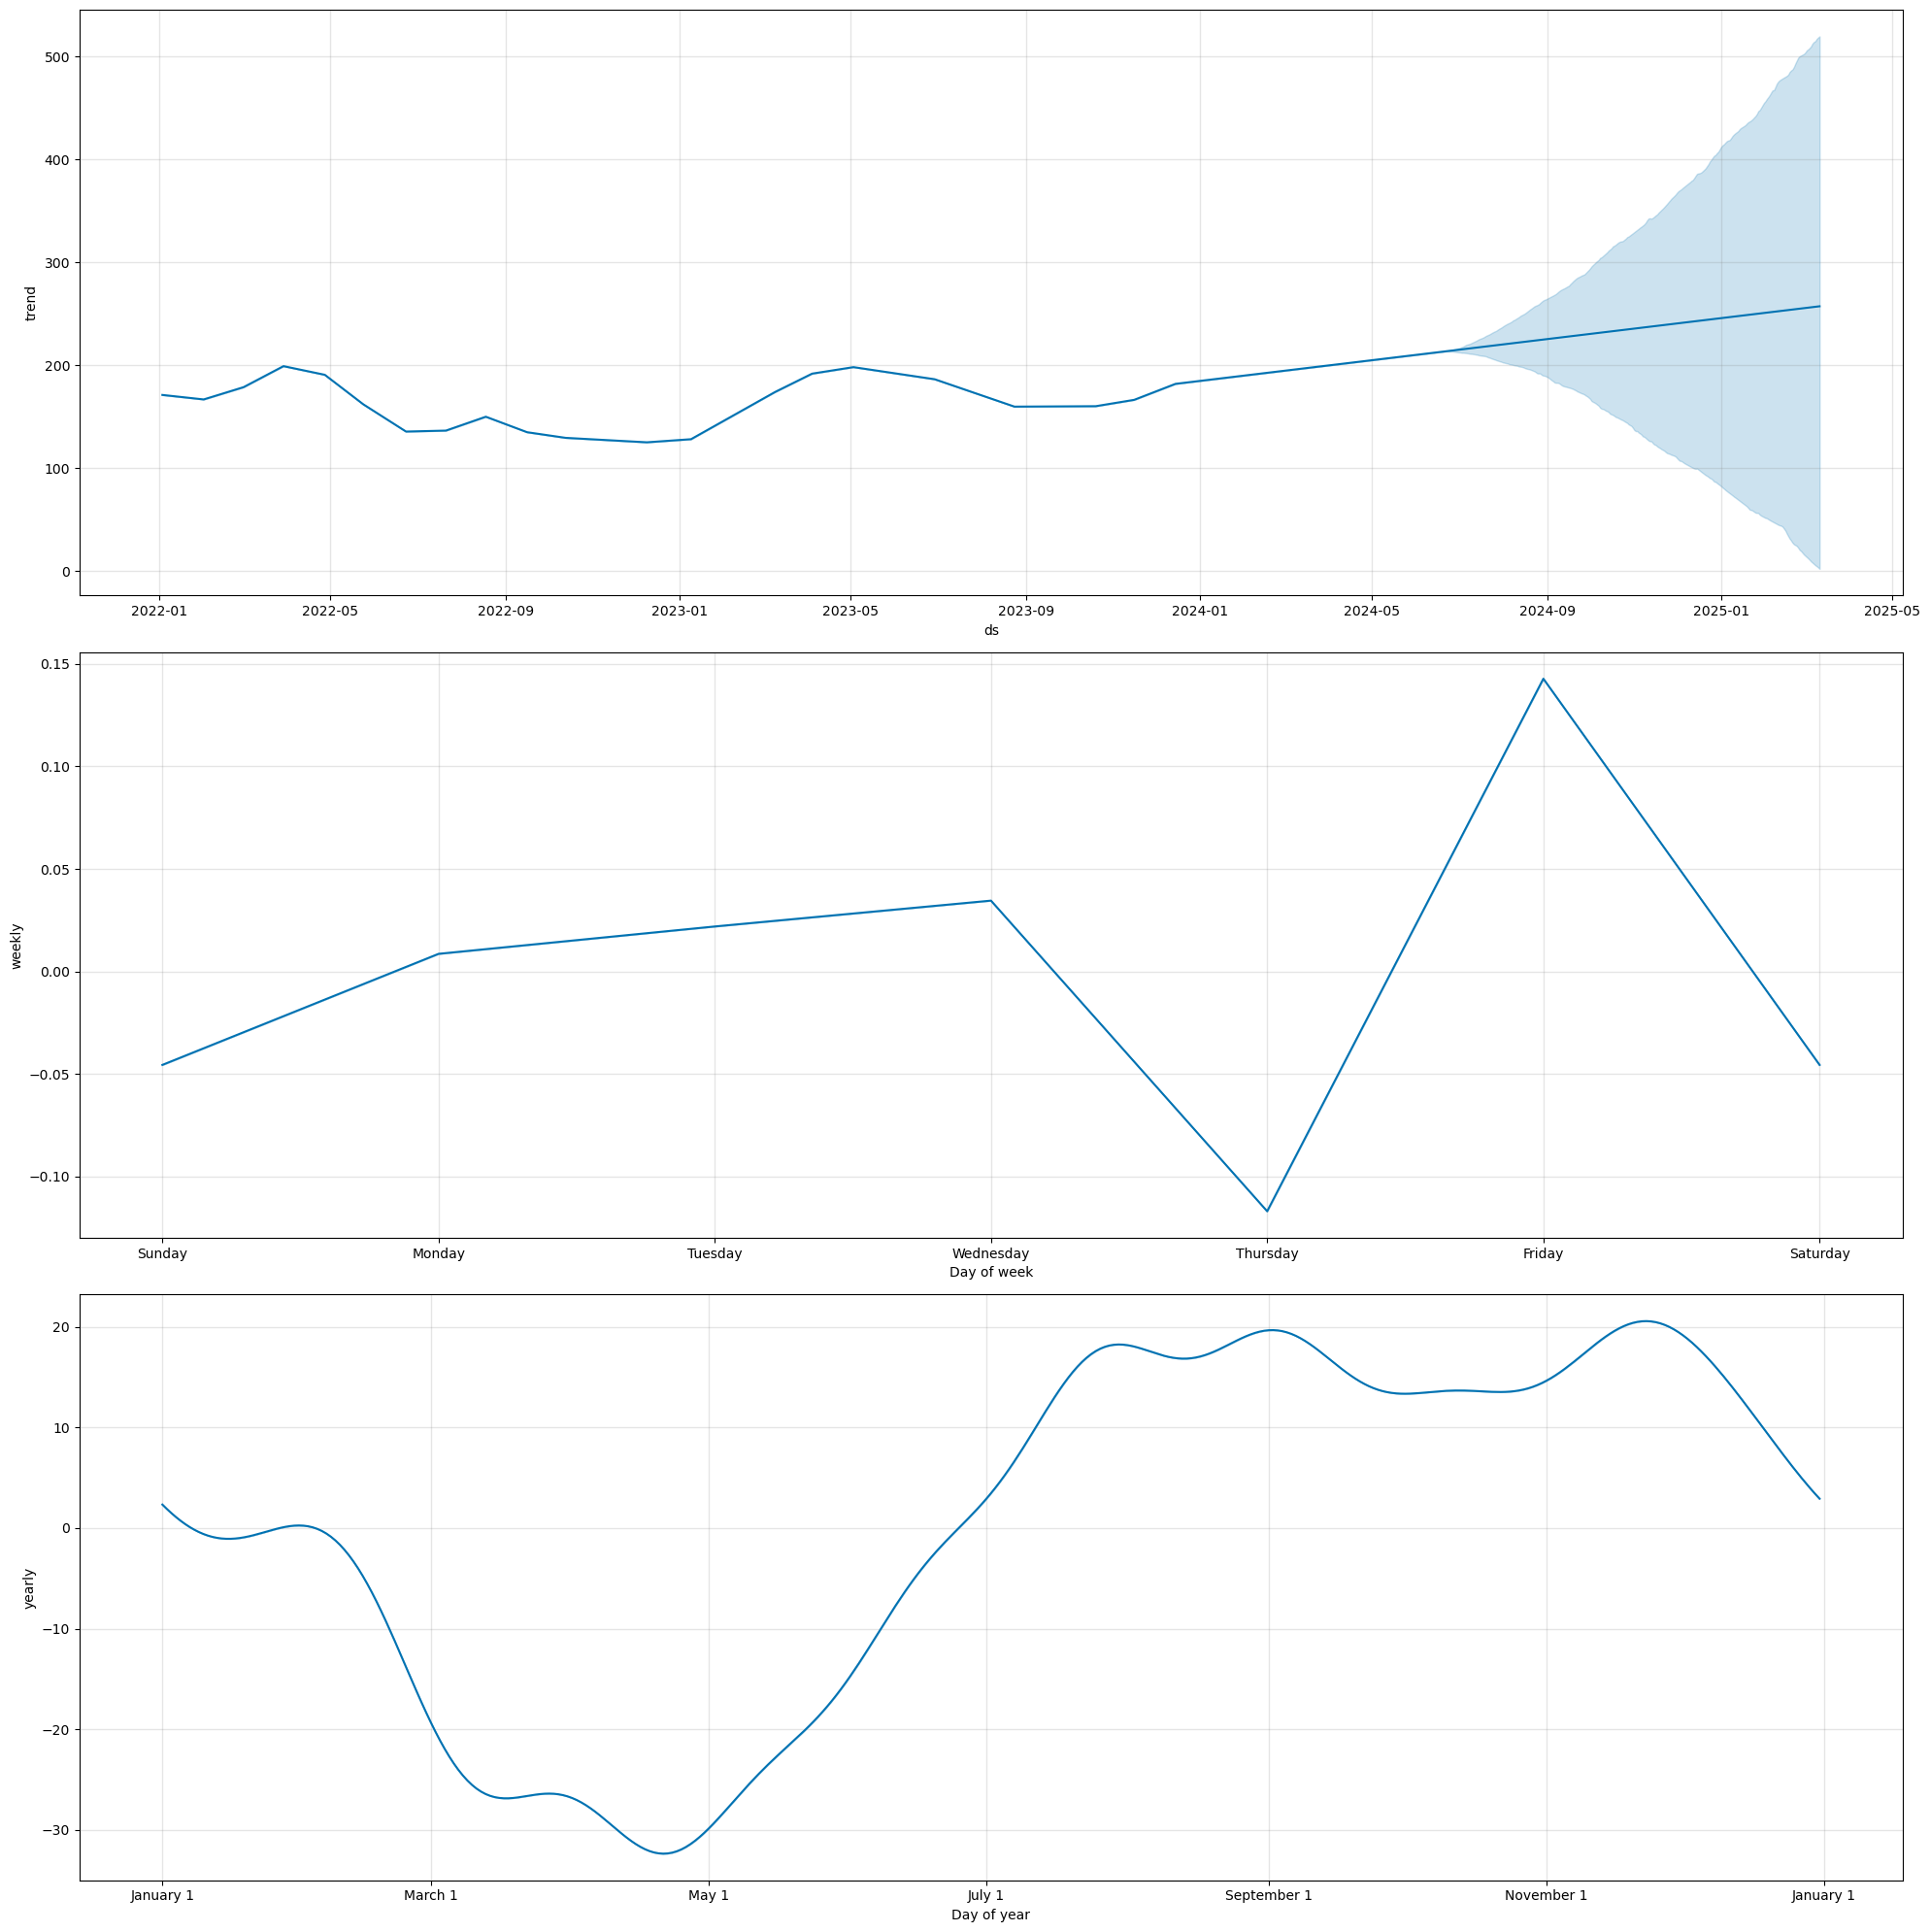

In [273]:
model.plot_components(forecast, figsize=(20, 20))
plt.show()

In [259]:
pre_b_df

Ticker,ds,y
0,2022-01-03,179.7246
1,2022-01-04,177.4436
2,2022-01-05,172.7236
3,2022-01-06,169.8403
4,2022-01-07,170.0081
...,...,...
611,2024-06-10,193.1200
612,2024-06-11,207.1500
613,2024-06-12,213.0700
614,2024-06-13,214.2400


In [260]:
train_df = pre_b_df.iloc[:int(len(pre_b_df) * 0.8)]
train_df

Ticker,ds,y
0,2022-01-03,179.7246
1,2022-01-04,177.4436
2,2022-01-05,172.7236
3,2022-01-06,169.8403
4,2022-01-07,170.0081
...,...,...
487,2023-12-11,192.9338
488,2023-12-12,194.4619
489,2023-12-13,197.7077
490,2023-12-14,197.8575


In [261]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools

# changepoint_prior_scale: trend의 변화하는 크기를 반영하는 정도이다, 0.05가 default
# seasonality_prior_scale: 계절성을 반영하는 단위이다.
# seasonality_mode: 계절성으로 나타나는 효과를 더해 나갈지, 곱해 나갈지 정한다.
search_space = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive']
}

# itertools.product(): 각 요소들의 모든 경우의 수 조합으로 생성
param_combinded = [dict(zip(search_space.keys(), v)) for v in itertools.product(*search_space.values())]

train_len = int(len(pre_b_df) * 0.8)
test_len = int(len(pre_b_df) * 0.2)

train_size = f'{train_len} days'
test_size = f'{test_len} days'
train_df = pre_b_df.iloc[: train_len]
test_df = pre_b_df.iloc[train_len: ]

mapes = []
for param in param_combinded:
    model = Prophet(**param)
    model.fit(train_df)

    # 'threads' 옵션은 메모리 사용량은 낮지만 CPU 바운드 작업에는 효과적이지 않을 수 있다.
    # 'dask' 옵션은 대규모의 데이터를 처리하는 데 효과적이다.
    # 'processes' 옵션은 각각의 작업을 별도의 프로세스로 실행하기 때문에 CPU 바운드 작업에 효과적이지만,
    # 메모리 사용량이 높을 수 있다.
    cv_df = cross_validation(model, initial=train_size, period='20 days', horizon=test_size, parallel='processes')
    df_p = performance_metrics(cv_df, rolling_window=1)
    mapes.append(df_p['mape'].values[0])

tuning_result = pd.DataFrame(param_combinded)
tuning_result['mape'] = mapes       

13:49:18 - cmdstanpy - INFO - Chain [1] start processing
13:49:18 - cmdstanpy - INFO - Chain [1] done processing
13:49:20 - cmdstanpy - INFO - Chain [1] start processing
13:49:20 - cmdstanpy - INFO - Chain [1] done processing
13:49:22 - cmdstanpy - INFO - Chain [1] start processing
13:49:22 - cmdstanpy - INFO - Chain [1] done processing
13:49:24 - cmdstanpy - INFO - Chain [1] start processing
13:49:24 - cmdstanpy - INFO - Chain [1] done processing
13:49:26 - cmdstanpy - INFO - Chain [1] start processing
13:49:26 - cmdstanpy - INFO - Chain [1] done processing
13:49:28 - cmdstanpy - INFO - Chain [1] start processing
13:49:28 - cmdstanpy - INFO - Chain [1] done processing
13:49:31 - cmdstanpy - INFO - Chain [1] start processing
13:49:31 - cmdstanpy - INFO - Chain [1] done processing
13:49:33 - cmdstanpy - INFO - Chain [1] start processing
13:49:33 - cmdstanpy - INFO - Chain [1] done processing
13:49:35 - cmdstanpy - INFO - Chain [1] start processing
13:49:36 - cmdstanpy - INFO - Chain [1]

In [262]:
tuning_result.sort_values(by='mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
6,0.10,1.00,additive,0.136227
7,0.10,10.00,additive,0.136702
5,0.10,0.10,additive,0.136704
4,0.10,0.05,additive,0.136863
3,0.05,10.00,additive,0.136917
23,10.00,10.00,additive,0.137013
21,10.00,0.10,additive,0.137037
16,5.00,0.05,additive,0.137039
22,10.00,1.00,additive,0.137136
19,5.00,10.00,additive,0.137156


In [263]:
model = Prophet(changepoint_prior_scale=0.5, 
                seasonality_prior_scale=0.1, 
                seasonality_mode='additive')

model.fit(pre_b_df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][221:]

13:50:46 - cmdstanpy - INFO - Chain [1] start processing
13:50:46 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
221,2022-11-17,146.510873,141.591153,151.495402
222,2022-11-18,146.918881,142.466695,151.719239
223,2022-11-21,147.007035,142.653085,151.715738
224,2022-11-22,147.013052,141.747850,151.818918
225,2022-11-23,146.975266,142.138578,151.870832
...,...,...,...,...
976,2025-06-10,264.041926,-176.232956,700.117319
977,2025-06-11,264.921124,-178.104442,702.840305
978,2025-06-12,265.621763,-182.169611,703.143905
979,2025-06-13,266.715965,-178.481084,704.646542


In [264]:
b_df = pre_b_df.copy()
b_df.set_index('ds', inplace=True)

forecast_df = forecast.copy()
forecast_df = forecast_df.set_index('ds')

b_df.index = pd.to_datetime(b_df.index)
forecast_df.index = pd.to_datetime(forecast_df.index)

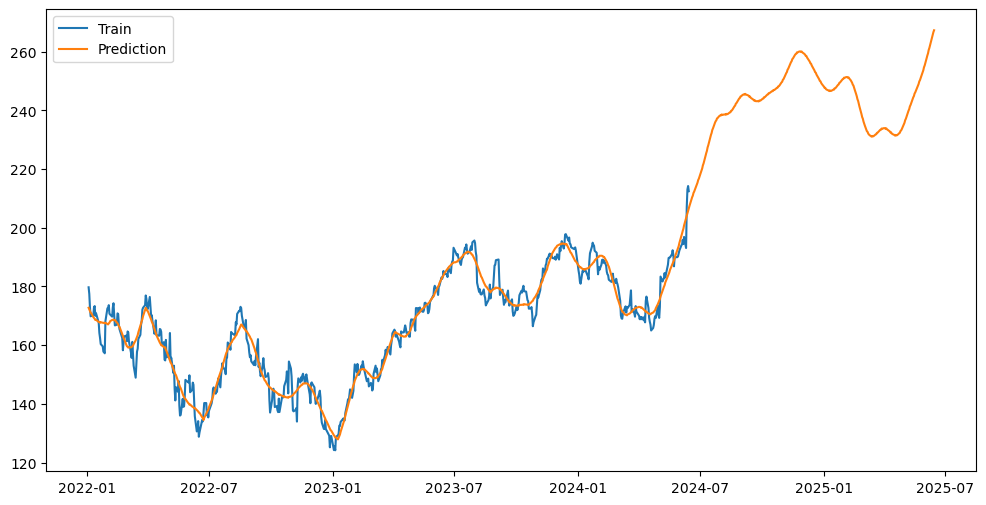

In [265]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(b_df[['y']], label='Train')
plt.plot(forecast_df[['yhat']], label='Prediction')
plt.legend()
plt.show()

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


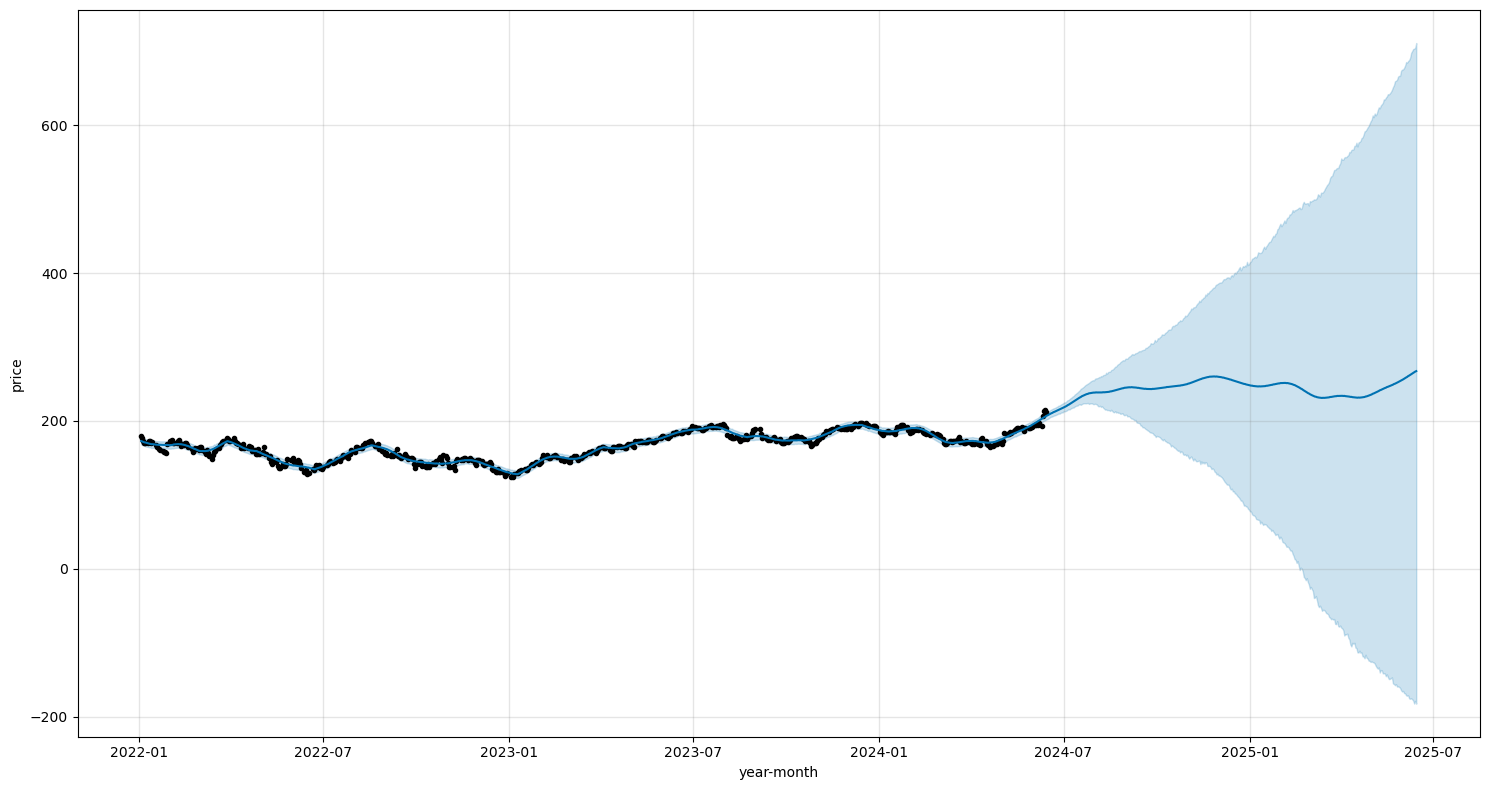

In [266]:
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()
# 검은점들이 실제 데이터

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects inste

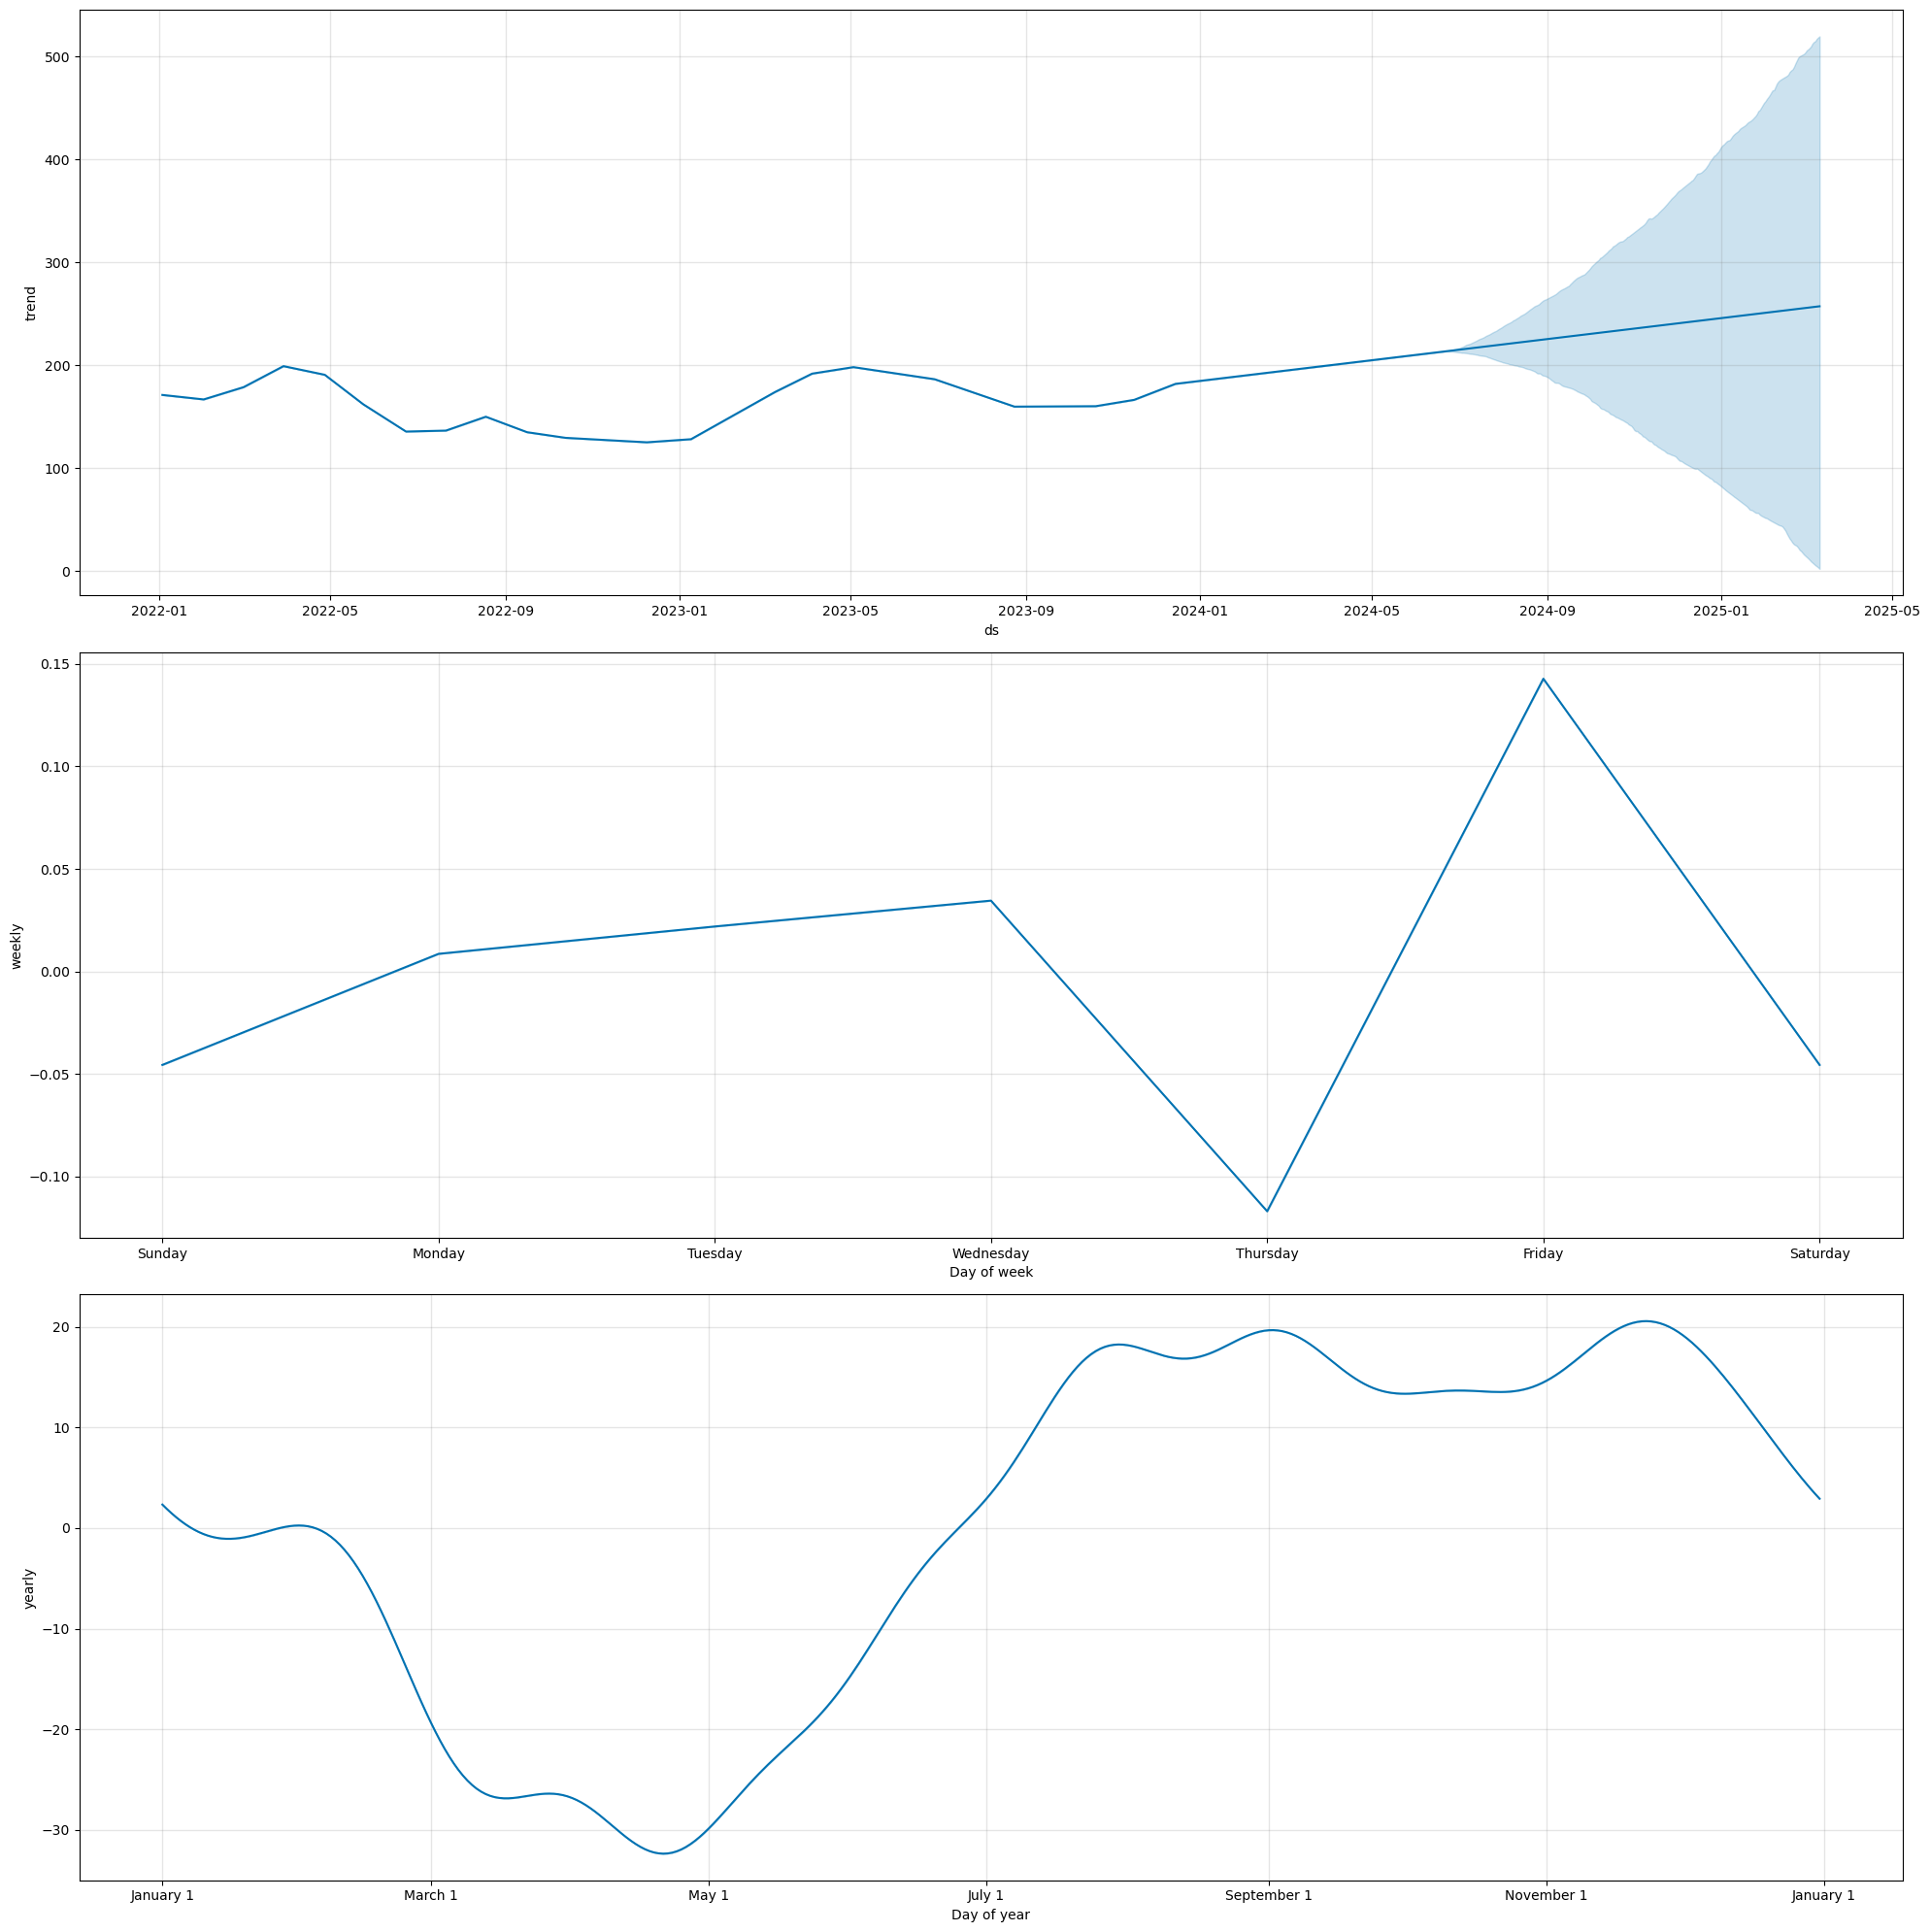

In [274]:
model.plot_components(forecast, figsize=(20, 20))
plt.show()